In [ ]:
# Google Colab Project for Calculating vegetation indices for AlUla Project

import ee
try:
        ee.Initialize()
except Exception as e:
        ee.Authenticate()
        ee.Initialize()


In [ ]:
!pip install earthengine-api #earth-engine Python API
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.5 MB/s eta 0:00:00


In [ ]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


In [ ]:
# The following cell will display a thumbnail of the global elevation model.

# Import the Image function from the IPython.display module.
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url = dem.updateMask(dem.gt(0))
  .getThumbURL({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

Interactive map

The folium library can be used to display ee.Image objects on an interactive Leaflet map. Folium has no default method for handling tiles from Earth Engine, so one must be defined and added to the folium.Map module before use.

The following cell provides an example of adding a method for handing Earth Engine tiles and using it to display an elevation model to a Leaflet map.

In [ ]:
# Import the Folium library.
import folium

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3)

# Add the elevation model to the map object.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Display the map.
display(my_map)

In [ ]:
# Import the matplotlib.pyplot module.

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Select Red and NIR bands, scale them, and sample 500 points.
samp_fc = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()




The geemap Python package is built upon the ipyleaflet and folium packages and implements several methods for interacting with Earth Engine data layers, such as Map.addLayer(), Map.setCenter(), and Map.centerObject(). The following script checks if the geemap package has been installed. If not, it will install geemap, which automatically installs its dependencies, including earthengine-api, folium, and ipyleaflet.

In [ ]:


# Installs geemap package
import subprocess

try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap', 'descartes'])

import ee
import geemap

In [ ]:
#This is only required if running in colab notebook to install the libraries
#If running Python code elsewhere, need to make sure below libraries are installed
! pip install geopandas
! pip install descartes
! pip install rasterio
! pip install rasterstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
# Connect to your Google Drive in order to save the images we'll be collecting later

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
#from jmd_imagescraper.core import *

project = "ALULA_Project"
path = Path(project)

folder_path = f'Data-image-classifier/data/{project}'
file_name = f'{project}.tgz'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from sklearn.model_selection import train_test_split
import geopandas as gpd
import descartes
import rasterio
from rasterio.mask import mask
from rasterio.features import geometry_mask
from shapely.geometry import mapping
from rasterstats import zonal_stats
import datetime

In [ ]:

from urllib.request import urlopen
import ee
import geemap
import os
from datetime import date, datetime, timedelta

import requests
import json
import pprint


import numpy as np

#import descartes
import rasterio


S2_MSI_Level1C = ee.ImageCollection("COPERNICUS/S2")
SAU_AlUla = ee.FeatureCollection("users/Frednumbisi/SAU_Al-Ula")

AlUlaAOI = ee.Geometry.Polygon(
         [[36.497464654846446, 27.719292717890305],
          [36.497464654846446, 25.499579734854645],
          [39.178128717346446, 25.499579734854645],
          [39.178128717346446, 27.719292717890305]], None, False)

May22AlUla = ee.FeatureCollection("projects/ee-frednumbisi/assets/AlULa_May22AOIb");

AlUlaArea = ee.Geometry.Polygon(
         [[36.343656061096446, 27.93304354929672],
          [36.343656061096446, 25.122177797942495],
          [39.639554498596446, 25.122177797942495],
          [39.628568170471446, 26.507949632062942],
          [39.639554498596446, 27.93304354929672]])

#Al_Ula = ee.FeatureCollection("projects/ee-frednumbisi/assets/SAU_Al-Ula")

Al_Ula = ee.FeatureCollection("projects/ee-frednumbisi/assets/AlUla_AOIProject")

AlUla_DEMextent4TWI = ee.FeatureCollection("projects/ee-frednumbisi/assets/AlUla_DEMextract4TWI")

#Al_UlaROI = ee.Geometry.Polygon(ee.FeatureCollection("projects/ee-frednumbisi/assets/AlUla_BoundaryAOI"))

Al_UlaROI = Al_Ula.geometry()


# Create and interactive map
Map = geemap.Map(center=(40, -100), zoom=4)


# center the map on an Earth Engine object:
# Map.centerObject(ee_object=xy, zoom=13)
Map.centerObject(ee_object=Al_Ula, zoom=13); # Get centre map to AlUla

# Plot the Service Districts without any additional arguments
#AlUlaArea.to_crs(epsg=4326).plot(figsize=(10, 10));

# # Earth Engine layers to Map
#Map.addLayer(Al_Ula, vis_params, "AlUla Project Area")
#Map.addLayer(AlUlaArea, vis_params, "AlUla DEM Clipping")


viewport = ee.Geometry.Rectangle([39.639554498596446, 25.122177797942495, 36.343656061096446, 27.93304354929672])

In [ ]:
# set your root directory to the shared drive folder
# root_dir = '/content/drive/Shared drives/servir-sat-ml/data/'
root_dir = '/content/drive/My Drive/'

# go to root directory
%cd $root_dir

/content/drive/My Drive


In [ ]:
import geopandas as gpd

# Read in the services district shapefile and look at the first few rows
AlUla_DELtwiExtent = gpd.read_file(root_dir +'/RBGE_AlUla/AlUlaAOI/AlUla_DEMextract4TWI.shp')
print(AlUla_DELtwiExtent.head())

   id  Area                                           geometry
0   1  None  POLYGON ((36.36678 27.75970, 39.20737 27.79270...


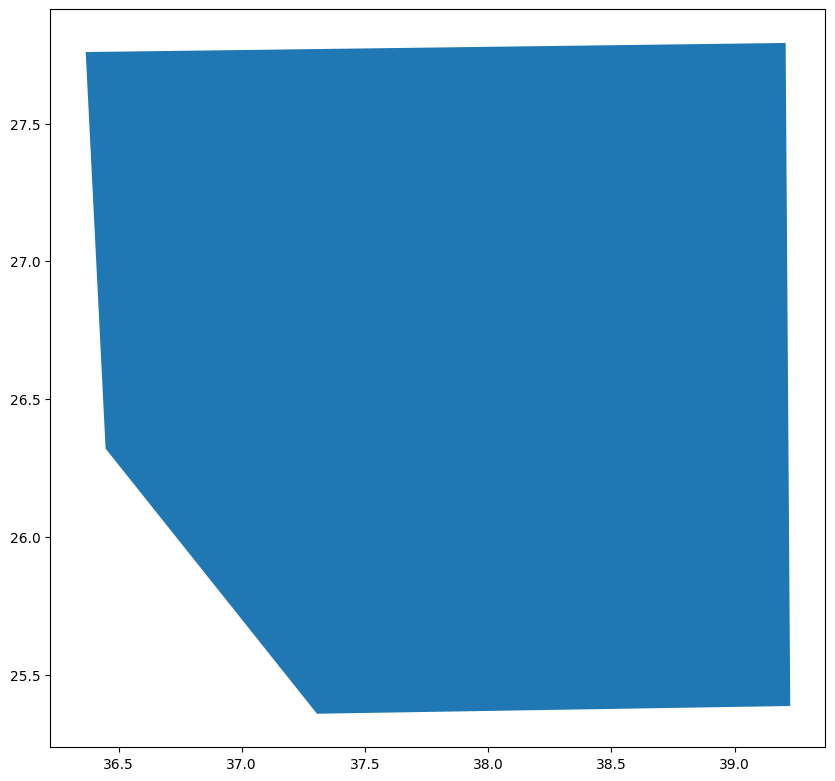

In [ ]:
# Plot the AlUla_DELtwiExtent without any additional arguments
AlUla_DELtwiExtent.to_crs(epsg=4326).plot(figsize=(10, 10));

In [ ]:

Al_UlaROI.plot(figsize=(10, 10));

AttributeError: ignored

In [ ]:

from urllib.request import urlopen
import ee
import geemap
import os
from datetime import date, datetime, timedelta

import requests
import json
import pprint


import numpy as np
import geopandas as gpd

#import descartes
import rasterio


S2_MSI_Level1C = ee.ImageCollection("COPERNICUS/S2")
SAU_AlUla = ee.FeatureCollection("users/Frednumbisi/SAU_Al-Ula")

AlUlaAOI = ee.Geometry.Polygon(
         [[36.497464654846446, 27.719292717890305],
          [36.497464654846446, 25.499579734854645],
          [39.178128717346446, 25.499579734854645],
          [39.178128717346446, 27.719292717890305]], None, False)

May22AlUla = ee.FeatureCollection("projects/ee-frednumbisi/assets/AlULa_May22AOIb");

AlUlaArea = ee.Geometry.Polygon(
         [[36.343656061096446, 27.93304354929672],
          [36.343656061096446, 25.122177797942495],
          [39.639554498596446, 25.122177797942495],
          [39.628568170471446, 26.507949632062942],
          [39.639554498596446, 27.93304354929672]])

#Al_Ula = ee.FeatureCollection("projects/ee-frednumbisi/assets/SAU_Al-Ula")

Al_Ula = ee.FeatureCollection("projects/ee-frednumbisi/assets/AlUla_AOIProject")

#Al_UlaROI = ee.Geometry.Polygon(ee.FeatureCollection("projects/ee-frednumbisi/assets/AlUla_BoundaryAOI"))

Al_UlaROI = Al_Ula.geometry()

# Create function that adds a band representing the image timestamp.
def addTime(image):
  return image.addBands(image.metadata('system:time_start').divide(1000 * 60 * 60 * 24 * 365))


# Load a Sentinel-2 collection
s2Collection = S2_MSI_Level1C
NIR = "B8"  # Name variable for NIR band (B8 for Sentinel2, or B5 for Landsat)

# Filter data collection over time period and bands (Red, Green, Blue, and NIR)
# On 2nd May 2023, I updated image time series collection interval to Sept 30th 2023 on
# and map the time band function over it.
s2Filtered = ee.ImageCollection("COPERNICUS/S2").filterDate('2021-01-01', '2023-09-30') \
                         .filterBounds(Al_Ula) \
                         .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 1) \
                         .map(addTime)\
                         .select(['B4', 'B3', 'B2', NIR])

# Create visualisation parameter
rgb_vis = {
  'min': 0,
  'max': 2600,
  'gamma': 1.4,
}

# Create variable to compute and add NDVI image
def calNDVI(img):
  ndvi = img.normalizedDifference([NIR, 'B4']).rename('NDVI')
  return img.addBands(ndvi)

def addNDVI(image):
  ndvi = image.normalizedDifference([NIR, 'B4']).rename('NDVI')
  return image.addBands(ndvi)

def get_days(date):
  m = date.millis()
  return m.divide(1000).divide(3600).toInt()

# Create variable to add a 'date' band: number of days since epoch
def addDate(img):
  d = ee.Date(img.date())
  days = get_days(d)
  days_img = ee.Image.constant(days).rename('date').toInt32()
  return img.addBands(days_img)


#-----------------------------------------------------------------------------
# // compute the infrared percentage vegetation index (ndvi)
def compute_ndvi(image):
    nir = image.select('B8').divide(10000)
    red = image.select('B4').divide(10000)
    ndvi = nir.subtract(red).divide(nir.add(red)).rename('NDVI')
    invndvi = ee.Image.constant(0).subtract(ndvi).rename('invndvi')
    return image.addBands(ndvi).addBands(invndvi)

plusNDVI = s2Filtered.map(compute_ndvi)


# / Get the 25th and 75th percentile NDVI value for each pixe in image collection
def filter_ndvi75(image):
  ndvi_75 = image.reduce(ee.Reducer.percentile([75]))
  ndvi_25 = image.reduce(ee.Reducer.percentile([25]))
  lte75_mask = image.select('NDVI').lte(ndvi_75)
  image = image.updateMask(lte75_mask.select('NDVI'))
  image = image.updateMask(image.select('NDVI').gte(ndvi_25))
  return image

filtered_ndvi75 = plusNDVI.map(filter_ndvi75)

BestNDVI25_75perc = filtered_ndvi75.qualityMosaic('NDVI').clip(Al_Ula)

#BestNDVI25_75percB = filtered_ndvi75.qualityMosaic('NDVI').clip(Al_Ula).astype(rasterio.uint8)

# ndviParams = {min: -1, max: 1, palette: ['blue', 'white', 'green']};
# Map.addLayer(ndvi, ndviParams, 'NDVI image');
# #print(BestNDVI25_95perc)


meanNDVI25_75perc = filtered_ndvi75.mean()
stdNDVI25_75perc = filtered_ndvi75.reduce(ee.Reducer.stdDev())



# Create and interactive map

Map = geemap.Map(center=(40, -100), zoom=4)


# # Earth Engine layers to Map
# Map.addLayer(meanNDVI25_75perc, rgb_vis, "Mean NDVI Composite 25th to 75th Perc.")
# Map.addLayer(stdNDVI25_75perc, rgb_vis, "StDev NDVI Composite 25th to 75th Perc.")


# center the map on an Earth Engine object:
# Map.centerObject(ee_object=xy, zoom=13)
Map.centerObject(ee_object=Al_Ula, zoom=13); # Get centre map to AlUla


viewport = ee.Geometry.Rectangle([39.639554498596446, 25.122177797942495, 36.343656061096446, 27.93304354929672])
#print(s2Filtered.size())
#print(s2Filtered.filterBounds(viewport).size())




#meanNDVIAlUla = meanNDVI25_75perc

#meanNDVIAlUla = (meanNDVI25_95perc).astype(rasterio.float32)
#stdNDVIAlUla = (stdNDVI25_95perc).astype(rasterio.float32)

#-------------------------------------------------------------


# import ee

# # Define the function to calculate MSAVI2
# def calculate_msavi2(image):
#     msavi2 = image.expression(
#         '0.5 * ((2 * NIR + 1) - (sqrt(pow((2 * NIR + 1), 2) - 8 * (NIR - RED)) ) ) ',
#         { 'NIR': image.select('B8').divide(10000),
#           'RED': image.select('B4').divide(10000)}).rename('MSAVI2')
#     invmsavi2 = ee.Image.constant(0).subtract(msavi2).rename('invmsavi2')
#     return image.addBands(msavi2).addBands(invmsavi2)

# # Apply the function to the filtered image collection
# plusMSAVI2 = s2Filtered.map(calculate_msavi2)

# # Define the function to filter based on MSAVI2 percentiles
# def filter_msavi75(image):
#     msavi_75 = image.reduce(ee.Reducer.percentile([75]))
#     msavi_25 = image.reduce(ee.Reducer.percentile([25]))
#     lte75_mask = image.select('MSAVI2').lte(msavi_75)
#     image = image.updateMask(lte75_mask.select('MSAVI2'))
#     image = image.updateMask(image.select('MSAVI2').gte(msavi_25))
#     return image

# # Apply the filtering function to the plusMSAVI2 image collection
# filtered_msavi75 = plusMSAVI2.map(filter_msavi75)

# # Calculate the mean and standard deviation of the filtered image collection
# meanMSAVI25_75perc = filtered_msavi75.mean()
# stdMSAVI25_75perc = filtered_msavi75.reduce(ee.Reducer.stdDev())

# # Convert meanMSAVI25_75perc to float
# meanMSAVI2AlUla = meanMSAVI25_75perc.toFloat()

# # Export the image as a cloud-optimized GeoTIFF
# ee.batch.Export.image.toDrive({
#     'image': meanMSAVI2AlUla.clip(Al_Ula),
#     'description': '2023AlUlaMSAVI2mean',
#     'scale': 10,
#     'region': meanMSAVI2AlUla.clip(Al_Ula),
#     'folder': 'AlUla_VegIndicators2023Mean',
#     'maxPixels': 3784216672400,
#     'crs': 'EPSG:3857',
#     'fileFormat': 'GeoTIFF',
#     'formatOptions': {
#         'cloudOptimized': True
#     }
# })



#---------------------------------------------------------------------------------




# COMPUTE VEGETATION INDICES
# ------------------------------------------------------------
# NDVI
# // compute the normalised difference vegetation index (ndvi)
def compute_ndvi(image):
    nir = image.select('B8')
    red = image.select('B4')
    ndvi = nir.subtract(red).divide(nir.add(red)).rename('NDVI')
    invndvi = ee.Image.constant(0).subtract(ndvi).rename('invndvi')
    return image.addBands(ndvi).addBands(invndvi)

plusNDVI = s2Filtered.map(compute_ndvi)


# / Get the 25th and 75th percentile NDVI value for each pixe in image collection
def filter_ndvi75(image):
  ndvi_75 = image.reduce(ee.Reducer.percentile([75]))
  ndvi_25 = image.reduce(ee.Reducer.percentile([25]))
  lte75_mask = image.select('NDVI').lte(ndvi_75)
  image = image.updateMask(lte75_mask.select('NDVI'))
  image = image.updateMask(image.select('NDVI').gte(ndvi_25))
  return image


filtered_ndvi75 = plusNDVI.map(filter_ndvi75)
#print(filtered_ndvi95)

BestNDVI25_75perc = filtered_ndvi75.qualityMosaic('NDVI').clip(Al_UlaROI)
#print(BestNDVI25_95perc)

# meanNDVI25_75perc = filtered_ndvi75.mean()
meanNDVI25_75perc = filtered_ndvi75.reduce(ee.Reducer.mean())
stdNDVI25_75perc = filtered_ndvi75.reduce(ee.Reducer.stdDev())
minNDVI25_75perc = filtered_ndvi75.reduce(ee.Reducer.min())
maxNDVI25_75perc = filtered_ndvi75.reduce(ee.Reducer.max())
medNDVI25_75perc = filtered_ndvi75.reduce(ee.Reducer.median())



# ---------------------------------------------------------------------------
# SAVI

# Function to compute SAVI
def compute_savi(image):
    # compute the soil-adjusted vegetation index (savi)
    savi = image.expression('1.5 * (NIR - RED) / (NIR + RED + 0.5)', {
        'NIR': image.select('B8').divide(10000),
        'RED': image.select('B4').divide(10000)}).rename('SAVI')
    # return image.addBands(gsavi)
    # get inverted gsavi
    invsavi = ee.Image.constant(0).subtract(savi).rename('invsavi')
    return image.addBands(savi).addBands(invsavi)

plusSAVI = s2Filtered.map(compute_savi)

# plusSAVI = s2Filtered.map(lambda image:
#                            image.addBands(image.expression('1.5 * (NIR - RED) / (NIR + RED + 0.5)', {
#                                'NIR': image.select('B8').divide(10000),
#                                'RED': image.select('B4').divide(10000)}).rename('SAVI'))
#                            .addBands(ee.Image.constant(0).subtract(image.select('savi')).rename('invsavi')))


def filter_savi75(image):
    # Get the 75th percentile NDVI value for image
    savi_75 = image.reduce(ee.Reducer.percentile([75]))
    # Get the 25th percentile NDVI value for image
    savi_25 = image.reduce(ee.Reducer.percentile([25]))
    # Create a mask selecting all values less than the 75th percentile
    lte75_mask = image.select('SAVI').lte(savi_75)
    # Update the image removing all values > the 75th percentile
    image = image.updateMask(lte75_mask.select('SAVI'))
    # Update the image removing all values < the 25th percentile
    image = image.updateMask(image.select('SAVI').gte(savi_25))
    return image



# filter image collection by NDVI 95th percentile
filtered_savi75 = plusSAVI.map(filter_savi75)

print(filtered_savi75)

# create greenest pixel quality mosaic
BestSAVI25_75perc = filtered_savi75.qualityMosaic('SAVI').clip(Al_UlaROI)


# leastGSAVI25_95perc = filtered_gsavi95.qualityMosaic('invgsavi')
# meanSAVI25_75perc = filtered_savi75.mean()
meanSAVI25_75perc = filtered_savi75.reduce(ee.Reducer.mean())
stdSAVI25_75perc = filtered_savi75.reduce(ee.Reducer.stdDev());
minSAVI25_75perc = filtered_savi75.reduce(ee.Reducer.min());
maxSAVI25_75perc = filtered_savi75.reduce(ee.Reducer.max());
medSAVI25_75perc = filtered_savi75.reduce(ee.Reducer.median());


# ---------------------------------------------------------------------------
# MSAVI2

# plusMSAVI2 = s2Filtered.map(lambda image:
#                            image.addBands(image.expression('0.5 * ((2 * NIR + 1)-(sqrt(pow((2 * NIR + 1), 2) - 8 * (NIR - RED)) ) )', {
#                                'NIR': image.select('B8').divide(10000),
#                                'RED': image.select('B4').divide(10000)}).rename('MSAVI'))
#                            .addBands(ee.Image.constant(0).subtract(image.select('msavi')).rename('invmsavi')))


# Define the function to compute MSAVI2
def compute_msavi2(image):
    msavi = image.expression('0.5 * ((2 * NIR + 1) - (sqrt(pow((2 * NIR + 1), 2) - 8 * (NIR - RED)) ) )', {
        'NIR': image.select('B8').divide(10000),
        'RED': image.select('B4').divide(10000)}).rename('MSAVI')
    invmsavi = ee.Image.constant(0).subtract(msavi).rename('invmsavi')
    return image.addBands(msavi).addBands(invmsavi).float()

plusMSAVI2 = s2Filtered.map(compute_msavi2)

# def compute_msavi2(image):
#     NIR = image.select('B8').divide(10000)
#     RED = image.select('B4').divide(10000)
#     msavi2 = NIR.multiply(2).add(1).subtract((NIR.multiply(2).add(1).pow(2) - NIR.subtract(RED).multiply(8)).sqrt()).multiply(0.5)
#     return msavi2.rename('MSAVI2')

# def compute_invmsavi2(image):
#     msavi2 = compute_msavi2(image)
#     invmsavi2 = ee.Image.constant(0).subtract(image.select('msavi2')).rename('invmsavi2')
#     return invmsavi2

# # Map both functions (computing msavi2 and its inverse values) to the image collection
# plusMSAVI2 = s2Filtered.map(lambda image: image.addBands(compute_msavi2(image)).addBands(compute_invmsavi2(image)))


def filter_msavi75(image):
    msavi_75 = image.reduce(ee.Reducer.percentile([75]))
    msavi_25 = image.reduce(ee.Reducer.percentile([25]))
    lte75_mask = image.select('MSAVI').lte(msavi_75)
    image = image.updateMask(lte75_mask.select('MSAVI'))
    image = image.updateMask(image.select('MSAVI').gte(msavi_25))
    return image

filtered_msavi2575 = plusMSAVI2.map(filter_msavi75)

# meanMSAVI25_75perc = filtered_msavi2575.mean()
meanMSAVI25_75perc = filtered_msavi2575.reduce(ee.Reducer.mean())
stdMSAVI25_75perc = filtered_msavi2575.reduce(ee.Reducer.stdDev())
minMSAVI25_75perc = filtered_msavi2575.reduce(ee.Reducer.min())
maxMSAVI25_75perc = filtered_msavi2575.reduce(ee.Reducer.max())
medMSAVI25_75perc = filtered_msavi2575.reduce(ee.Reducer.median())


#-------------------------------------------------------------------------------
# GSAVI


def compute_gsavi(image):
    # compute the soil-adjusted vegetation index (savi)
    gsavi = image.expression('1.5 * (NIR - GREEN) / (NIR + GREEN + 0.5)', {
        'NIR': image.select('B8').divide(10000),
        'GREEN': image.select('B3').divide(10000)}).rename('GSAVI')
    # return image.addBands(gsavi)
    # get inverted gsavi
    invgsavi = ee.Image.constant(0).subtract(gsavi).rename('invgsavi')
    return image.addBands(gsavi).addBands(invgsavi)


plusGSAVI = s2Filtered.map(compute_gsavi)

# plusGSAVI = s2Filtered.map(lambda image:
#                            image.addBands(image.expression('1.5 * (NIR - GREEN) / (NIR + GREEN + 0.5)', {
#                                'NIR': image.select('B8').divide(10000),
#                                'GREEN': image.select('B3').divide(10000)}).rename('GSAVI'))
#                            .addBands(ee.Image.constant(0).subtract(image.select('gsavi')).rename('invgsavi')))


def filter_gsavi75(image):
    gsavi_75 = image.reduce(ee.Reducer.percentile([75]))
    gsavi_25 = image.reduce(ee.Reducer.percentile([25]))
    lte75_mask = image.select('GSAVI').lte(gsavi_75)
    image = image.updateMask(lte75_mask.select('GSAVI'))
    image = image.updateMask(image.select('GSAVI').gte(gsavi_25))
    return image

filtered_gsavi2575 = plusGSAVI.map(filter_gsavi75)

# meanGSAVI25_75perc = filtered_gsavi2575.mean()
meanGSAVI25_75perc = filtered_gsavi2575.reduce(ee.Reducer.mean())
stdGSAVI25_75perc = filtered_gsavi2575.reduce(ee.Reducer.stdDev())
minGSAVI25_75perc = filtered_gsavi2575.reduce(ee.Reducer.min())
maxGSAVI25_75perc = filtered_gsavi2575.reduce(ee.Reducer.max())
medGSAVI25_75perc = filtered_gsavi2575.reduce(ee.Reducer.median())


# ------------------------------------------------------------------------------
# IPVI

def compute_ipvi(image):
  # compute the green-red vegetation index (grvi)
    ipvi = image.expression('NIR/(NIR + RED)', {
      'NIR': image.select('B8').divide(10000),
      'RED': image.select('B4').divide(10000)}).rename('IPVI');
    # get inverted grvi
    invipvi = ee.Image.constant(0).subtract(ipvi).rename('invipvi')
    return image.addBands(ipvi).addBands(invipvi)


plusIPVI = s2Filtered.map(compute_ipvi)


# plusIPVI = s2Filtered.map(lambda image:
#     image.addBands(
#         image.expression('NIR/(NIR+RED)', {
#             'NIR': image.select('B8').divide(10000),
#             'RED': image.select('B4').divide(10000)
#         }).rename('ipvi')
#     ).addBands(
#         ee.Image.constant(0).subtract(image.select('ipvi')).rename('invipvi')
#     )
# )


def IPVIfilter(image):
    ipvi_75 = image.reduce(ee.Reducer.percentile([75]))
    ipvi_25 = image.reduce(ee.Reducer.percentile([25]))
    lte75_mask = image.select('IPVI').lte(ipvi_75)
    image = image.updateMask(lte75_mask.select('IPVI'))
    image = image.updateMask(lte75_mask.select('IPVI').gte(ipvi_25))
    return image

filtered_ipvi2575 = plusIPVI.map(IPVIfilter)

# meanIPVI25_75perc = filtered_ipvi2575.mean()
meanIPVI25_75perc = filtered_ipvi2575.reduce(ee.Reducer.mean())
stdIPVI25_75perc = filtered_ipvi2575.reduce(ee.Reducer.stdDev())
minIPVI25_75perc = filtered_ipvi2575.reduce(ee.Reducer.min())
maxIPVI25_75perc = filtered_ipvi2575.reduce(ee.Reducer.max())
medIPVI25_75perc = filtered_ipvi2575.reduce(ee.Reducer.median())


#----------------------------------------------------
# SARVI


# Define the function to compute SARVI
def compute_sarvi(image):
    sarvi = image.expression('(NIR - (RED - 1 * (BLUE - RED))) / (NIR + (RED - 1 * (BLUE - RED)))', {
        'NIR': image.select('B8').divide(10000),
        'BLUE': image.select('B2').divide(10000),
        'RED': image.select('B4').divide(10000)}).rename('SARVI')
    invsarvi = ee.Image.constant(0).subtract(sarvi).rename('invsarvi')
    return image.addBands(sarvi).addBands(invsarvi)

def filter_sarvi75(image):
    sarvi_75 = image.reduce(ee.Reducer.percentile([75]))
    sarvi_25 = image.reduce(ee.Reducer.percentile([25]))
    lte75_mask = image.select('SARVI').lte(sarvi_75)
    image = image.updateMask(lte75_mask.select('SARVI'))
    image = image.updateMask(lte75_mask.select('SARVI').gte(sarvi_25))
    return image

# compute SARVI for each image in the image collection using the .map()
plusSARVI = s2Filtered.map(compute_sarvi)

# Filter each image to the middle 50 percentile (IQR) for the values in each pixel
filtered_sarvi2575 = plusSARVI.map(filter_sarvi75)

#meanSARVI25_75perc = filtered_sarvi2575.mean()
# Reduce the Image Collection to Mean and Standard Deviation for each band in the filtered Image
meanSARVI25_75perc = filtered_sarvi2575.reduce(ee.Reducer.mean())
stdSARVI25_75perc = filtered_sarvi2575.reduce(ee.Reducer.stdDev())
minSARVI25_75perc = filtered_sarvi2575.reduce(ee.Reducer.min())
maxSARVI25_75perc = filtered_sarvi2575.reduce(ee.Reducer.max())
medSARVI25_75perc = filtered_sarvi2575.reduce(ee.Reducer.median())


#-----------------------------------------------------
# GRVI
# Define the function to compute GRVI

def compute_grvi(image):
  # compute the green-red vegetation index (grvi)
    grvi = image.expression('(GREEN - RED) / (GREEN + RED)', {
      'GREEN': image.select('B3').divide(10000),
      'RED': image.select('B4').divide(10000)}).rename('GRVI');
    # get inverted grvi
    invgrvi = ee.Image.constant(0).subtract(grvi).rename('invgrvi')

    return image.addBands(grvi).addBands(invgrvi)


def GRVIfilter(image):
    grvi_75 = image.reduce(ee.Reducer.percentile([75]))
    grvi_25 = image.reduce(ee.Reducer.percentile([25]))
    lte75_mask = image.select('GRVI').lte(grvi_75)
    image = image.updateMask(lte75_mask.select('GRVI'))
    image = image.updateMask(lte75_mask.select('GRVI').gte(grvi_25))
    return image

plusGRVI = s2Filtered.map(compute_grvi)
filtered_grvi2575 = plusGRVI.map(GRVIfilter)

meanGRVI25_75perc = filtered_grvi2575.mean()


# Use the non-default mean reducer for image collection
# This will append the name of reducer to the additional bands
meanGRVI25_75perc = filtered_grvi2575.reduce(ee.Reducer.mean())

# Compute standard deviation (SD) as texture of the vegetation index (GRVI).
stdGRVI25_75perc = filtered_grvi2575.reduce(ee.Reducer.stdDev())

# Reduce the coposites to single median of the vegetation index (GRVI).
#medGRVI25_75perc = filtered_grvi2575.reduce(ee.Reducer.median())
minGRVI25_75perc = filtered_grvi2575.reduce(ee.Reducer.min())
maxGRVI25_75perc = filtered_grvi2575.reduce(ee.Reducer.max())
medGRVI25_75perc = filtered_grvi2575.reduce(ee.Reducer.median())



# Reduce GRV IQR to max value and clip image to area of interest
BestGRVI25_75perc = filtered_grvi2575.qualityMosaic('GRVI').clip(Al_UlaROI)

from pprint import pprint

# Create combined reduecer and map to image collection
CombiReducers = ee.Reducer.mean().combine(
  reducer2=ee.Reducer.stdDev(),
  sharedInputs=True
)

# Use the combined reducer to get the mean and SD bands for each band image.
GRVIstats = filtered_grvi2575.reduce(
  reducer=CombiReducers)

# Display the dictionary of band means and SDs.
pprint(GRVIstats.getInfo())


# # Combine the mean and standard deviation reducers.
# # This does not work for image collections
# CombiReducers = ee.Reducer.mean().combine(
#   reducer2=ee.Reducer.stdDev(),
#   sharedInputs=True
# )

# # Use the combined reducer to get the mean and SD of the image.
# GRVIstats = filtered_grvi2575.reduceRegion(
#   reducer=CombiReducers,
#   bestEffort=True,
# )
# # Display the dictionary of band means and SDs.
# pprint(GRVIstats.getInfo())



# ------------------------------------------------------------------
# Apply the functions to the image collection

# plusNDVI = s2Filtered.map(compute_ndvi)
# plusSAVI = s2Filtered.map(compute_savi)
# plusMSAVI2 = s2Filtered.map(compute_msavi2)
# plusGSAVI = s2Filtered.map(compute_gsavi)
# plusIPVI = s2Filtered.map(compute_ipvi)
# plusSARVI = s2Filtered.map(compute_sarvi)
# plusGRVI = s2Filtered.map(compute_grvi)


# # Earth Engine layers to Map
# Map.addLayer(meanNDVI25_75perc, rgb_vis, "Mean NDVI Composite 25th to 75th Perc.")
# Map.addLayer(stdNDVI25_75perc, rgb_vis, "StDev NDVI Composite 25th to 75th Perc.")



# def IPVIfilter(image):
#     # Get the 95th percentile IPVI value for image
#     ipvi_75 = np.percentile(image, 75)
#     # Get the 25th percentile IPVI value for image
#     ipvi_25 = np.percentile(image, 25)
#     #var lte95_mask = image.select('ipvi').lte(ipvi95)
#     lte75_mask = image <= ipvi_75
#     # Update the image removing all values > the 95th percentile
#     image = np.where(lte75_mask, image, np.nan)
#     # Then Update the image removing all values > the 75th percentile and < the 25th percentile
#     image = np.where((lte75_mask) & (image >= ipvi_25), image, np.nan)

#     return image # image with all values > the 75th percentile and < the 25th percentile removed
#     #return lte95_mask

# filtered_ipvi2575 = list(map(IPVIfilter, plusIPVI))

# meanIPVI25_75perc = np.nanmean(filtered_ipvi2575)
# stdIPVI25_75perc = np.nanstd(filtered_ipvi2575)

#meanIPVIAlUla = np.float32(meanIPVI25_75perc)
#stdIPVIAlUla = np.float32(stdIPVI25_75perc)



# CREATE A COMPOSITE IMAGES FOR MEAN AND STD OF VEGETATION INDICES

def stackCollection(collection):
  # Create an initial image.
  first = ee.Image(collection.first()).select([])

  # Write a function that appends a band to an image.
  def appendBands(image, previous):
    return ee.Image(previous).addBands(image)
  return ee.Image(collection.iterate(appendBands, first))


# Create a composite from means of different vegetation indices.
# compositeMeanVIndices = ee.Image.cat([meanNDVI25_75perc.select(['NDVI']),
#   meanSAVI25_75perc.select(['SAVI']),
#   meanGSAVI25_75perc.select(['GSAVI']),
#   meanMSAVI25_75perc.select(['MSAVI2']),
#   meanIPVI25_75perc.select(['IPVI']),
#   meanSARVI25_75perc.select(['SARVI']),
#   meanGRVI25_75perc.select(['GRVI'])
# ])

# Cast each image to float32 bit
compositeMeanVIndices = meanNDVI25_75perc.select(['NDVI_mean'])\
  .addBands(meanSAVI25_75perc.select(['SAVI_mean']))\
  .addBands(meanGSAVI25_75perc.select(['GSAVI_mean']))\
  .addBands(meanMSAVI25_75perc.select(['MSAVI_mean']))\
  .addBands(meanIPVI25_75perc.select(['IPVI_mean']))\
  .addBands(meanSARVI25_75perc.select(['SARVI_mean']))\
  .addBands(meanGRVI25_75perc.select(['GRVI_mean']))



# Merge the collections.
# Merge the collections.
#landsat_col = oli_col.merge(etm_col).merge(tm_col)

# MeanVIndices_col = meanNDVI25_75perc.select(['NDVI_mean']).merge(meanSAVI25_75perc.select(['SAVI_mean'])).merge(meanGSAVI25_75perc.select(['GSAVI_mean']))\
# .merge(meanMSAVI25_75perc.select(['MSAVI_mean'])).merge(meanIPVI25_75perc.select(['IPVI_mean'])).merge(meanSARVI25_75perc.select(['SARVI_mean']))\
# .merge(meanGRVI25_75perc.select(['GRVI_mean']))


# # Define a join.
# join = ee.Join.saveAll()
# join_col = ee.ImageCollection(
#     join.apply(meanNDVI25_75perc.select(['NDVI_mean']), meanSAVI25_75perc.select(['SAVI_mean']),
#                meanGSAVI25_75perc.select(['GSAVI_mean']), meanMSAVI25_75perc.select(['MSAVI_mean']),
#                meanIPVI25_75perc.select(['IPVI_mean']), meanSARVI25_75perc.select(['SARVI_mean']),
#                meanGRVI25_75perc.select(['GRVI_mean'])))

# Apply the join and convert the resulting FeatureCollection to an
# ImageCollection.

# def stackCollection(collection):
#   # Create an initial image.
#   first = ee.Image(collection.first()).select([])

#   # Write a function that appends a band to an image.
#   def appendBands(image, previous):
#     return ee.Image(previous).addBands(image)
#   return ee.Image(collection.iterate(appendBands, first))


# # ee.ImageCollection to ee.Image
# MeanVIndices_col = stackCollection(compositeMeanVIndices)

# join_col = ee.ImageCollection(meanNDVI25_75perc.select(['NDVI_mean']), meanSAVI25_75perc.select(['SAVI_mean']),
#                meanGSAVI25_75perc.select(['GSAVI_mean']), meanMSAVI25_75perc.select(['MSAVI_mean']),
#                meanIPVI25_75perc.select(['IPVI_mean']), meanSARVI25_75perc.select(['SARVI_mean']),
#                meanGRVI25_75perc.select(['GRVI_mean']))


# # Get a list of all the image IDs from the Image Collection (Will be used to fetch images directly using ee.Image())
# VIs_Ids = MeanVIndices_col.aggregate_array("system:id").getInfo()

#-------------------------------------------------------------------------------
# Function to mask all values outside the geometry
def maskOutside(image, geometry):
    mask = ee.Image.constant(1).clip(geometry).mask() # add .not() to mask inside
    return image.updateMask(mask)

#-------------------------------------------------------------------------------



# #Print number of bands
# B = compositeMeanVIndices.count
# print(B)
# print(compositeMeanVIndices.shape)

# Display the dictionary of band means and SDs.
# pprint(compositeMeanVIndices.getInfo())



# compositeStdevVIndices = ee.Image.cat([
#   stdNDVI25_95perc.select(['NDVI']),
#   ee.ImageCollection(vhAscending.select('VV').merge(vhDescending.select('VV'))).mean(),
#   vhDescending.select('VH').mean()
# ]).focal_median()

# compositeStDevVIndices = ee.Image.cat([stdNDVI25_75perc.select(['NDVI_stdDev'])
# Create a composite from Standard deviation of different vegetation indices.
compositeStDevVIndices = stdNDVI25_75perc.select(['NDVI_stdDev'])\
  .addBands(stdSAVI25_75perc.select(['SAVI_stdDev']))\
  .addBands(stdGSAVI25_75perc.select(['GSAVI_stdDev']))\
  .addBands(stdMSAVI25_75perc.select(['MSAVI_stdDev']))\
  .addBands(stdIPVI25_75perc.select(['IPVI_stdDev']))\
  .addBands(stdSARVI25_75perc.select(['SARVI_stdDev']))\
  .addBands(stdGRVI25_75perc.select(['GRVI_stdDev']))


# Create Composite of MaxIQR of VI
compositeMaxVIndices = maxNDVI25_75perc.select(['NDVI_max'])\
  .addBands(maxSAVI25_75perc.select(['SAVI_max']))\
  .addBands(maxGSAVI25_75perc.select(['GSAVI_max']))\
  .addBands(maxMSAVI25_75perc.select(['MSAVI_max']))\
  .addBands(maxIPVI25_75perc.select(['IPVI_max']))\
  .addBands(maxSARVI25_75perc.select(['SARVI_max']))\
  .addBands(maxGRVI25_75perc.select(['GRVI_max']))


# Create Composite of MinIQR of VI
compositeMinVIndices = minNDVI25_75perc.select(['NDVI_min'])\
  .addBands(minSAVI25_75perc.select(['SAVI_min']))\
  .addBands(minGSAVI25_75perc.select(['GSAVI_min']))\
  .addBands(minMSAVI25_75perc.select(['MSAVI_min']))\
  .addBands(minIPVI25_75perc.select(['IPVI_min']))\
  .addBands(minSARVI25_75perc.select(['SARVI_min']))\
  .addBands(minGRVI25_75perc.select(['GRVI_min']))


# Create Composite of MinIQR of All Spectral Bands for Computed VIs
compositeAllVIspectralBands = meanNDVI25_75perc.select(['B4_mean', 'B3_mean','B2_mean','B8_mean'])\
  .addBands(meanSAVI25_75perc.select(['B4_mean', 'B3_mean','B2_mean','B8_mean']))\
  .addBands(meanGSAVI25_75perc.select(['B4_mean', 'B3_mean','B2_mean','B8_mean']))\
  .addBands(meanMSAVI25_75perc.select(['B4_mean', 'B3_mean','B2_mean','B8_mean']))\
  .addBands(meanIPVI25_75perc.select(['B4_mean', 'B3_mean','B2_mean','B8_mean']))\
  .addBands(meanSARVI25_75perc.select(['B4_mean', 'B3_mean','B2_mean','B8_mean']))\
  .addBands(meanGRVI25_75perc.select(['B4_mean', 'B3_mean','B2_mean','B8_mean']))\
  .addBands(minNDVI25_75perc.select(['B4_min', 'B3_min','B2_min','B8_min']))\
  .addBands(minSAVI25_75perc.select(['B4_min', 'B3_min','B2_min','B8_min']))\
  .addBands(minGSAVI25_75perc.select(['B4_min', 'B3_min','B2_min','B8_min']))\
  .addBands(minMSAVI25_75perc.select(['B4_min', 'B3_min','B2_min','B8_min']))\
  .addBands(minIPVI25_75perc.select(['B4_min', 'B3_min','B2_min','B8_min']))\
  .addBands(minSARVI25_75perc.select(['B4_min', 'B3_min','B2_min','B8_min']))\
  .addBands(minGRVI25_75perc.select(['B4_min', 'B3_min','B2_min','B8_min']))\
  .addBands(maxNDVI25_75perc.select(['B4_max', 'B3_max','B2_max','B8_max']))\
  .addBands(maxSAVI25_75perc.select(['B4_max', 'B3_max','B2_max','B8_max']))\
  .addBands(maxGSAVI25_75perc.select(['B4_max', 'B3_max','B2_max','B8_max']))\
  .addBands(maxMSAVI25_75perc.select(['B4_max', 'B3_max','B2_max','B8_max']))\
  .addBands(maxIPVI25_75perc.select(['B4_max', 'B3_max','B2_max','B8_max']))\
  .addBands(maxSARVI25_75perc.select(['B4_max', 'B3_max','B2_max','B8_max']))\
  .addBands(maxGRVI25_75perc.select(['B4_max', 'B3_max','B2_max','B8_max']))\
  .addBands(stdNDVI25_75perc.select(['B4_stdDev', 'B3_stdDev','B2_stdDev','B8_stdDev']))\
  .addBands(stdSAVI25_75perc.select(['B4_stdDev', 'B3_stdDev','B2_stdDev','B8_stdDev']))\
  .addBands(stdGSAVI25_75perc.select(['B4_stdDev', 'B3_stdDev','B2_stdDev','B8_stdDev']))\
  .addBands(stdMSAVI25_75perc.select(['B4_stdDev', 'B3_stdDev','B2_stdDev','B8_stdDev']))\
  .addBands(stdIPVI25_75perc.select(['B4_stdDev', 'B3_stdDev','B2_stdDev','B8_stdDev']))\
  .addBands(stdSARVI25_75perc.select(['B4_stdDev', 'B3_stdDev','B2_stdDev','B8_stdDev']))\
  .addBands(stdGRVI25_75perc.select(['B4_stdDev', 'B3_stdDev','B2_stdDev','B8_stdDev']))



# Create Composite of MinIQR of All Spectral Bands for Computed VIs
compositeVIspectralBands = meanNDVI25_75perc.select(['B4_mean', 'B3_mean','B2_mean','B8_mean'])\
  .addBands(minNDVI25_75perc.select(['B4_min', 'B3_min','B2_min','B8_min']))\
  .addBands(maxNDVI25_75perc.select(['B4_max', 'B3_max','B2_max','B8_max']))\
  .addBands(stdNDVI25_75perc.select(['B4_stdDev', 'B3_stdDev','B2_stdDev','B8_stdDev']))



# # Earth Engine layers to Map
Map.addLayer(meanNDVI25_75perc, rgb_vis, "Mean VI Composite 25th to 75th Perc.")
Map.addLayer(meanMSAVI25_75perc, rgb_vis, "Mean MSAVI2 Composite 25th to 75th Perc.")
Map.addLayer(meanIPVI25_75perc, rgb_vis, "Mean IPVI Composite 25th to 75th Perc.")

Map.addLayer(stdGRVI25_75perc, rgb_vis, "StDev GRVI Composite 25th to 75th Perc.")
Map.addLayer(stdSARVI25_75perc, rgb_vis, "StDev SARVI Composite 25th to 75th Perc.")
Map.addLayer(stdNDVI25_75perc, rgb_vis, "StDev NDVI Composite 25th to 75th Perc.")

Map.addLayer(minGRVI25_75perc, rgb_vis, "Min GRVI IQR")

Map.addLayer(compositeMeanVIndices, rgb_vis, "Mean VI Composite 25th to 75th Perc.")

#meanVI_AlUla = np.float32(compositeMeanVIndices)
#stdVI_AlUla = np.float32(compositeStDevVIndices)



# # EXPORT IMAGE COLLECTION
# # A) Export means as cloud-optimized GeoTIFF.

# with rasterio.open('meanIPVIAlUla.tif', 'w', driver='GTiff', height=meanIPVIAlUla.shape[0], width=meanIPVIAlUla.shape[1], count=1,
#                    dtype=meanIPVIAlUla.dtype, crs='EPSG:3857', transform=transform) as dst:
#     dst.write(meanIPVIAlUla, 1)



# # -------------- EXPORT IMAGE TO DRIVE ----------------------------------------
# # To export an image to your Drive account, use Export.image.toDrive().
# # For example, to export portions of a Landsat image, define a region to export,
# # then call ee.batch.Export.image.toDrive:

# #Map.addLayer(NDVIAlUla , rgb_vis, '2023 NDVI AlUla');
# # // c) Export as cloud-optimized GeoTIFF.
# task = ee.batch.Export.image.toDrive(**{
#   'image': meanNDVIAlUla.clip(Al_Ula),
#   'description': '2023AlUlaNDVImean',
#   'scale': 10,
#   'region': meanNDVIAlUla.clip(Al_Ula),
#   'folder': 'AlUla_VegIndicators2023Mean',
#   'maxPixels': 3784216672400,
#   'crs': 'EPSG:3857',
#   'fileFormat': 'GeoTIFF',
#   'formatOptions': {
#     'cloudOptimized': True
#   }
# })

# task.start()

# import time
# while task.active():
#   print('Polling for task (id: {}).'.format(task.id))
#   time.sleep(5)

# NDVImid50perc = ee.Image(meanNDVI25_75perc).select(['NDVI'])




#---------------------------------------------------------------------------
# Import the Folium library.
##import folium

### Use Ctrl+/ to comment of uncomment several lines of script
# # Define a method for displaying Earth Engine image tiles to folium map.
# def add_ee_layer(self, ee_image_object, vis_params, name):
#   map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
#   folium.raster_layers.TileLayer(
#     tiles = map_id_dict['tile_fetcher'].url_format,
#     attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
#     name = name,
#     overlay = True,
#     control = True
#   ).add_to(self)

# # Add EE drawing method to folium.
# folium.Map.add_ee_layer = add_ee_layer

# # Set visualization parameters.
# vis_params = {
#   'min': 0,
#   'max': 4000,
#   'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# # Create a folium map object.
# my_map = folium.Map(location=[20, 0], zoom_start=3)


# # Add the meanNDVI25_95perc to the map object.
# my_map.add_ee_layer(meanNDVI25_95perc, rgb_vis, "Mean NDVI Composite 25th to 95th Perc.")
# my_map.add_ee_layer(stdNDVI25_95perc, rgb_vis, "StDev NDVI Composite 25th to 95th Perc.")

# # Add a layer control panel to the map.
# my_map.add_child(folium.LayerControl())

# # Display the map.
# display(my_map)

Map

ee.ImageCollection({
  "functionInvocationValue": {
    "functionName": "Collection.map",
    "arguments": {
      "baseAlgorithm": {
        "functionDefinitionValue": {
          "argumentNames": [
            "_MAPPING_VAR_0_0"
          ],
          "body": {
            "functionInvocationValue": {
              "functionName": "Image.updateMask",
              "arguments": {
                "image": {
                  "functionInvocationValue": {
                    "functionName": "Image.updateMask",
                    "arguments": {
                      "image": {
                        "argumentReference": "_MAPPING_VAR_0_0"
                      },
                      "mask": {
                        "functionInvocationValue": {
                          "functionName": "Image.select",
                          "arguments": {
                            "bandSelectors": {
                              "constantValue": [
                                "SAVI"
          

Map(center=[26.66980997583897, 37.95340956703056], controls=(WidgetControl(options=['position', 'transparent_b…

In [ ]:
!pip install earthpy
!pip install geopandas
!pip install rasterio

!apt-get install -qq libgdal-dev libproj-dev
!pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 98.4 MB/s eta 0:00:00


In [ ]:
import cartopy
import pandas as pd
import geopandas as gpd
import folium
import os, shutil
from glob import glob
import numpy as np
import rasterio as rio
from rasterio.transform import from_origin
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from rasterio.plot import show, plotting_extent
from rasterio.merge import merge
from rasterio.warp import calculate_default_transform, reproject, Resampling
import earthpy.spatial as es
import earthpy.plot as ep



##**Principal Component Analysis (PCA)**
PCA is a very useful technique in improving your supervised classification results. This is a statistical technique that compresses data from a large number of bands into fewer uncorrelated bands. You can run PCA on your image and add the first few (typically 3) principal component bands to the original composite before sampling training points. The variance from the original multi-spectral (e.g. 28-band) image is captured in the 3-band (or 5-band) PCA image. This sends a stronger signal to the classifier and improves accuracy by allowing it to distinguish different classes better.

In [ ]:
!pip install wxee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
#%matplotlib inline

from sklearn.decomposition import PCA
import geopandas as gpd
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from osgeo import gdal

import json
import wxee
import ee
import geemap
#import sklearn_flatten, sklearn_unflatten


In [ ]:
# Import the necessary libraries
from PIL import Image
from numpy import asarray

In [ ]:
#arr = compositeMeanVIndices.wx.to_xarray(scale=10, crs="EPSG:4326")
#print(arr.shape)

In [ ]:
# To perform a PCA, data is first transformed into a numpy array that can be used by sklearn
# compositeMeanVIndices
# compositeStDevVIndices
# compositeMaxVIndices
# compositeMinVIndices
# compositeVIspectralBands # 16 spectral Bands

CompostMeanVI_Coll = ee.ImageCollection(compositeMeanVIndices)
CompostMeanVI_Coll.getInfo()
#compositeMeanVIndices
#from the input ee.Image as a 1D array.
#ds1D = compositeAllVIspectralBands.toArray(3);

#ds2D = ds1D.toArray(1)
#ds3D = ds1D.toArray(2)
#ImageArr = np.array(compositeAllVIspectralBands.ReadAsArray())

#pixels = x_data.flatten().reshape(1000, 12288)
#X = sklearn_flatten(compositeAllVIspectralBands)
#print(ImageArr.shape)
#print(ds3D.shape)
#ds3D



#AOI = Al_Ula.geometry()

#compositeAllVI_arr = geemap.ee_to_numpy(compositeMeanVIndices, region=AOI)
#print(compositeAllVI_arr.shape)

{'type': 'ImageCollection',
 'bands': [],
 'features': [{'type': 'Image',
   'bands': [{'id': 'NDVI_mean',
     'data_type': {'type': 'PixelType', 'precision': 'float'},
     'crs': 'EPSG:4326',
     'crs_transform': [1, 0, 0, 0, 1, 0]},
    {'id': 'SAVI_mean',
     'data_type': {'type': 'PixelType',
      'precision': 'double',
      'min': -19.660500526428223,
      'max': 19.660500526428223},
     'crs': 'EPSG:4326',
     'crs_transform': [1, 0, 0, 0, 1, 0]},
    {'id': 'GSAVI_mean',
     'data_type': {'type': 'PixelType',
      'precision': 'double',
      'min': -19.660500526428223,
      'max': 19.660500526428223},
     'crs': 'EPSG:4326',
     'crs_transform': [1, 0, 0, 0, 1, 0]},
    {'id': 'MSAVI_mean',
     'data_type': {'type': 'PixelType', 'precision': 'float'},
     'crs': 'EPSG:4326',
     'crs_transform': [1, 0, 0, 0, 1, 0]},
    {'id': 'IPVI_mean',
     'data_type': {'type': 'PixelType', 'precision': 'float'},
     'crs': 'EPSG:4326',
     'crs_transform': [1, 0, 0, 0, 

In [ ]:
compositeMeanVI_coll_fin = maskOutside(CompostMeanVI_Coll, Al_Ula)

In [ ]:
compositeMeanVI_coll = ee.ImageCollection(compositeMeanVIndices)

compositeMeanVI_coll.getInfo()

In [ ]:
compositeMeanVI_coll_fin = maskOutside(compositeMeanVI_coll, Al_Ula)

In [ ]:

#After re-projecting the image to Mercator projection, it worked:


In [ ]:


# Export the image, specifying scale and region.
# Export the Standardised IQR Images

task = ee.batch.Export.image.toDrive(
    image = compositeMeanVIndices,
    region = Al_Ula.geometry().bounds(), # Or use custom ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])
    description = '2023AlUla_MeanVI_Composit',
    scale = 10,
    folder = "KSA_AlUla_VIIQR_Composits",
    crs = 'EPSG:4326',
    #crs ='EPSG:3857', # UTM CRS for Saudi
    #crsTransform = proj["transform"],
    maxPixels = 1e13,
    fileFormat = "GeoTIFF",
    formatOptions = {
    'cloudOptimized': True
  }
    )

task.start()

import time
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

Polling for task (id: DPPRGWDIF5O3Q4TCVM7NMXN4).
Polling for task (id: DPPRGWDIF5O3Q4TCVM7NMXN4).


In [ ]:
# Export the image, specifying scale and region.
task = ee.batch.Export.image.toDrive(**{
    'image': l8_image,
    'description': 'Landsat8_2020_Nepal',
    'folder': output_drive_folder,
    'fileNamePrefix': raster_name,
    'scale': 30,
    'region': gee_aoi,
    'fileFormat': 'GeoTIFF',
    'formatOptions': {
      'cloudOptimized': 'true'
    },
})


In [ ]:
compositeAllVIspectralBands
arrayImage1D = compositeAllVIspectralBands.toArray()
arrayImage1D

In [ ]:
#Make an Array Image with a 2-D Array per pixel, 6x1.
arrayImage2D = arrayImage1D.toArray(1)
arrayImage2D

In [ ]:
arrayImage2D.getInfo()

{'type': 'Image',
 'bands': [{'id': 'array',
   'data_type': {'type': 'PixelType', 'precision': 'double', 'dimensions': 2},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]}]}

In [ ]:
arrayImage3D = arrayImage2D.toArray(2)
arrayImage3D.getInfo()

{'type': 'Image',
 'bands': [{'id': 'array',
   'data_type': {'type': 'PixelType', 'precision': 'double', 'dimensions': 3},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]}]}

In [ ]:
# Make an Array Image, with a 1-D Array per pixel.
arrayImage1D = compositeMeanVIndices.toArray();

# Make an Array Image with a 2-D Array per pixel.
arrayImage2D = arrayImage1D.toArray(1)

# Make an Array Image with a 3-D Array per pixel.
arrayImage3D = arrayImage1D.toArray(2)

arrayImage3D

In [ ]:
# load the image and convert into
# numpy array
#img = Image.open(compositeAllVIspectralBands)

# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(img)

# <class 'numpy.ndarray'>
print(type(numpydata))

#  shape
print(numpydata.shape)

In [ ]:
compositeAllVIspectralBands

In [ ]:
pca = PCA(n_components=5)
#pca.fit(ImageArr)
#PCA(n_components=2)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

In [ ]:
# Reshaping the Image Dimension

#Get the format of the orginal data
n_samples, nx, ny =

In [ ]:
# Conduct PCA of All Composite

# Run the PCA function
compositeAllVIimage = ee.Image(compositeAllVIspectralBands)
#pca = PCA(compositeAllVIspectralBands)

# Extract the properties of the pca image
#variance = pca.toDictionary()
#print('Variance of Principal Components', variance)
#pca

# Convert image to 1D
#ds1D = compositeAllVIimage.toArray();

# Convert image to 1D
#ds2D = ds1D.toArray(1)
#ds3D = ds1D.toArray(2)

compositeAllVIimage

In [ ]:
# As you see from the printed results, ~97% of the variance
# from the original image is captured in the first 3 principal components
# We select those and discard others
pca = PCA(compositeAllVIspectralBands).select(['pc1', 'pc2', 'pc3'])
print('First 3 PCA Bands', pca);


### Exporting each band as one image

In [ ]:
out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
filename = os.path.join(out_dir, 'MeanVI.tif')

AOI = Al_Ula.geometry()

# Convert the reduced mean images to float23
NDVImean = ee.Image(meanNDVI25_75perc.select(['NDVI_mean']).float())
SAVImean = ee.Image(meanSAVI25_75perc.select(['SAVI_mean']).float())
GSAVImean = ee.Image(meanGSAVI25_75perc.select(['GSAVI_mean']).float())
MSAVImean = ee.Image(meanMSAVI25_75perc.select(['MSAVI_mean']).float())
IPVImean = ee.Image(meanIPVI25_75perc.select(['IPVI_mean']).float())
SARVImean = ee.Image(meanSARVI25_75perc.select(['SARVI_mean']).float())
GRVImean = ee.Image(meanGRVI25_75perc.select(['GRVI_mean']).float())


In [ ]:
# Apply the maskOutside() function to clip image and Replace all values outside region or No Data with -9999

#image = maskOutside(compositeMeanVIndices, Al_Ula).unmask(-9999)

image_VImean = maskOutside(compositeMeanVIndices, Al_Ula)

image_NDVImean = maskOutside(NDVImean, Al_Ula)
image_SAVImean = maskOutside(SAVImean, Al_Ula)
image_GSAVImean = maskOutside(GSAVImean, Al_Ula)
image_MSAVImean = maskOutside(MSAVImean, Al_Ula)
image_IPVImean = maskOutside(IPVImean, Al_Ula)
image_SARVImean = maskOutside(SARVImean, Al_Ula)
image_GRVImean = maskOutside(GRVImean, Al_Ula)


#image_std = maskOutside(compositeStDevVIndices, Al_Ula).unmask(-9999)
image_std = maskOutside(compositeStDevVIndices, Al_Ula)

In [ ]:
# Convert each image of standarDeviation of IQR to float32: To be used for texture-based predictors
# Apply the maskOutside() function to clip image and Replace all values outside region or No Data with -9999

image_NDVIstD = maskOutside(ee.Image(stdNDVI25_75perc.select(['NDVI_stdDev']).float()), Al_Ula)
image_SAVIstD = maskOutside(ee.Image(stdSAVI25_75perc.select(['SAVI_stdDev']).float()), Al_Ula)
image_GSAVIstD = maskOutside(ee.Image(stdGSAVI25_75perc.select(['GSAVI_stdDev']).float()), Al_Ula)
image_MSAVIstD = maskOutside(ee.Image(stdMSAVI25_75perc.select(['MSAVI_stdDev']).float()), Al_Ula)
image_IPVIstD = maskOutside(ee.Image(stdIPVI25_75perc.select(['IPVI_stdDev']).float()), Al_Ula)
image_SARVIstD = maskOutside(ee.Image(stdSARVI25_75perc.select(['SARVI_stdDev']).float()), Al_Ula)
image_GRVIstD = maskOutside(ee.Image(stdGRVI25_75perc.select(['GRVI_stdDev']).float()), Al_Ula)

In [ ]:
# Convert each image of minimum IQR to float32:

image_NDVImin = maskOutside(ee.Image(minNDVI25_75perc.select(['NDVI_min']).float()), Al_Ula)
image_SAVImin = maskOutside(ee.Image(minSAVI25_75perc.select(['SAVI_min']).float()), Al_Ula)
image_GSAVImin = maskOutside(ee.Image(minGSAVI25_75perc.select(['GSAVI_min']).float()), Al_Ula)
image_MSAVImin = maskOutside(ee.Image(minMSAVI25_75perc.select(['MSAVI_min']).float()), Al_Ula)
image_IPVImin = maskOutside(ee.Image(minIPVI25_75perc.select(['IPVI_min']).float()), Al_Ula)
image_SARVImin = maskOutside(ee.Image(minSARVI25_75perc.select(['SARVI_min']).float()), Al_Ula)
image_GRVImin = maskOutside(ee.Image(minGRVI25_75perc.select(['GRVI_min']).float()), Al_Ula)



In [ ]:
# Conver each image of median IQR to float32

image_NDVImed = maskOutside(ee.Image(medNDVI25_75perc.select(['NDVI_median']).float()), Al_Ula)
image_SAVImed = maskOutside(ee.Image(medSAVI25_75perc.select(['SAVI_median']).float()), Al_Ula)
image_GSAVImed = maskOutside(ee.Image(medGSAVI25_75perc.select(['GSAVI_median']).float()), Al_Ula)
image_MSAVImed = maskOutside(ee.Image(medMSAVI25_75perc.select(['MSAVI_median']).float()), Al_Ula)
image_IPVImed = maskOutside(ee.Image(medIPVI25_75perc.select(['IPVI_median']).float()), Al_Ula)
image_SARVImed = maskOutside(ee.Image(medSARVI25_75perc.select(['SARVI_median']).float()), Al_Ula)
image_GRVImed = maskOutside(ee.Image(medGRVI25_75perc.select(['GRVI_median']).float()), Al_Ula)


In [ ]:
# Convert the reduced image of maximum IQR to float32

image_NDVImax = maskOutside(ee.Image(maxNDVI25_75perc.select(['NDVI_max']).float()), Al_Ula)
image_SAVImax = maskOutside(ee.Image(maxSAVI25_75perc.select(['SAVI_max']).float()), Al_Ula)
image_GSAVImax = maskOutside(ee.Image(maxGSAVI25_75perc.select(['GSAVI_max']).float()), Al_Ula)
image_MSAVImax = maskOutside(ee.Image(maxMSAVI25_75perc.select(['MSAVI_max']).float()), Al_Ula)
image_IPVImax = maskOutside(ee.Image(maxIPVI25_75perc.select(['IPVI_max']).float()), Al_Ula)
image_SARVImax = maskOutside(ee.Image(maxSARVI25_75perc.select(['SARVI_max']).float()), Al_Ula)
image_GRVImax = maskOutside(ee.Image(maxGRVI25_75perc.select(['GRVI_max']).float()), Al_Ula)



In [ ]:
# Convert the reduced image of spectral Bands IQR to float32
image_B4mean = maskOutside(ee.Image(compositeVIspectralBands.select(['B4_mean']).float()), Al_Ula)
image_B3mean = maskOutside(ee.Image(compositeVIspectralBands.select(['B3_mean']).float()), Al_Ula)
image_B2mean = maskOutside(ee.Image(compositeVIspectralBands.select(['B2_mean']).float()), Al_Ula)
image_B8mean = maskOutside(ee.Image(compositeVIspectralBands.select(['B8_mean']).float()), Al_Ula)
image_B4min = maskOutside(ee.Image(compositeVIspectralBands.select(['B4_min']).float()), Al_Ula)
image_B3min = maskOutside(ee.Image(compositeVIspectralBands.select(['B3_min']).float()), Al_Ula)
image_B2min = maskOutside(ee.Image(compositeVIspectralBands.select(['B2_min']).float()), Al_Ula)
image_B8min = maskOutside(ee.Image(compositeVIspectralBands.select(['B8_min']).float()), Al_Ula)
image_B4max = maskOutside(ee.Image(compositeVIspectralBands.select(['B4_max']).float()), Al_Ula)
image_B3max = maskOutside(ee.Image(compositeVIspectralBands.select(['B3_max']).float()), Al_Ula)
image_B2max = maskOutside(ee.Image(compositeVIspectralBands.select(['B2_max']).float()), Al_Ula)
image_B8max = maskOutside(ee.Image(compositeVIspectralBands.select(['B8_max']).float()), Al_Ula)
image_B4std = maskOutside(ee.Image(compositeVIspectralBands.select(['B4_stdDev']).float()), Al_Ula)
image_B3std = maskOutside(ee.Image(compositeVIspectralBands.select(['B3_stdDev']).float()), Al_Ula)
image_B2std = maskOutside(ee.Image(compositeVIspectralBands.select(['B2_stdDev']).float()), Al_Ula)
image_B8std = maskOutside(ee.Image(compositeVIspectralBands.select(['B8_stdDev']).float()), Al_Ula)



In [ ]:
image_B4mean.getInfo()

{'type': 'Image',
 'bands': [{'id': 'B4_mean',
   'data_type': {'type': 'PixelType', 'precision': 'float'},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]}]}

### ***FEATURE SCALING***

Normalisation or Standardization of Vegetation indices

In [ ]:
# Compute standardised median image
# ndvi1999 = NIR.subtract(Red).divide(NIR.add(Red))

# #maskOutside(ee.Image(filtered_grvi2575.qualityMosaic('GRVI').select(['GRVI']).float()), Al_Ula)

# Reduce IRQ of Vegetation index to max value (i.e. the best/highest value)
# Standard max of IQR by subtracting the Mean IQR and dividing by SD of IQR
# standard_NDVI = maskOutside(ee.Image(filtered_ndvi75.qualityMosaic('NDVI').select(['NDVI']).float()), Al_Ula).subtract(image_NDVImean).divide(image_NDVIstD)

standard_NDVI = image_NDVImed.subtract(image_NDVImean).divide(image_NDVIstD)
standard_SAVI = image_SAVImed.subtract(image_SAVImean).divide(image_SAVIstD)
standard_GSAVI = image_GSAVImed.subtract(image_GSAVImean).divide(image_GSAVIstD)
standard_MSAVI = image_MSAVImed.subtract(image_MSAVImean).divide(image_MSAVIstD)
standard_IPVI = image_IPVImed.subtract(image_IPVImean).divide(image_IPVIstD)
standard_SARVI = image_SARVImed.subtract(image_SARVImean).divide(image_SARVIstD)

standard_GRVI = image_GRVImax.subtract(image_GRVImean).divide(image_GRVIstD)


# Visualise computed image
Map.addLayer(standard_GRVI, rgb_vis, "GRVI Standardised IQR")
Map

# Map standardisation across each NDVI image in collection



Map(bottom=887578.0, center=[26.66980997583897, 37.95340956703056], controls=(WidgetControl(options=['position…

In [ ]:
spectral_BandsIQR = {"image_B4mean":image_B4mean ,"image_B3mean":image_B3mean,"image_B2mean":image_B2mean,"image_B8mean":image_B8mean, "image_B4min":image_B4min, "image_B3min":image_B3min,
                     "image_B2min":image_B2min,"image_B8min":image_B8min,"image_B4max":image_B4max, "image_B3max":image_B3max, "image_B2max":image_B2max,
                     "image_B8max":image_B8max, "image_B4std":image_B4std, "image_B3std":image_B3std, "image_B2std":image_B2std, "image_B8std":image_B8std}

In [ ]:
spectral_BandsIQR2 = { "image_B4max":image_B4max, "image_B3max":image_B3max, "image_B2max":image_B2max,
                     "image_B8max":image_B8max, "image_B4std":image_B4std, "image_B3std":image_B3std, "image_B2std":image_B2std, "image_B8std":image_B8std}

In [ ]:
for i in range(len(spectral_BandsIQR)):
  name = spectral_BandsIQR[i]
  Bandname = spectral_BandsIQR[i]

  fname = ee.String(Bandname).getInfo()
  #print('2023AlUla_%s_IQR'%(name))
  spectral_BandsIQR[i].getInfo()

In [ ]:
for key, value in spectral_BandsIQR.items():
  fname = ee.String(key).getInfo()
  print('2023AlUla_IQR_'+value)
  #Bandname = spectral_BandsIQR[i]


TypeError: ignored

In [ ]:

# Export the Spectral Band IQR Images
for key, value in spectral_BandsIQR2.items():
  fname = ee.String(key).getInfo()

  task = ee.batch.Export.image.toDrive(
    #image = Bandname.replace('"', ''),
    #image = Bandname.strip(),
    image = value,
    region = Al_Ula.geometry().bounds(), # Or use custom ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])
    description = '2023AlUla_IQR_'+fname,
    scale = 10,
    folder = "KSA_AlUla_SprectralBands_IQR",
    crs = 'EPSG:4326',
    #crs ='EPSG:3857', # UTM CRS for Saudi
    #crsTransform = proj["transform"],
    maxPixels = 1e13,
    fileFormat = "GeoTIFF",
    formatOptions = {
    'cloudOptimized': True
  }
    )

  task.start()

  import time

  while task.active():
    counter = 0
    print('Polling for task (id: {}).process: {}'.format(task.id, counter))
    counter += 1
    time.sleep(5)





Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id: 2ZW4ERH7F4ZOQWUTJPDA223W).
Polling for task (id

In [ ]:
# Get location of the band rasters images (.tif files) in Google Drive
VIbands_folder_path = "/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/"

# Get the names of all band rasters in the folder as a list

VIband_rasters = [os.path.join(VIbands_folder_path, f) for f in os.listdir(VIbands_folder_path) if f.endswith(".tif")]


In [ ]:
VIband_rasters

['/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/2023AlUla_IQR_image_B4mean.tif',
 '/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/2023AlUla_IQR_image_B3mean.tif',
 '/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/2023AlUla_IQR_image_B2mean.tif',
 '/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/2023AlUla_IQR_image_B8mean.tif',
 '/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/2023AlUla_IQR_image_B4min.tif',
 '/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/2023AlUla_IQR_image_B3min.tif',
 '/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/2023AlUla_IQR_image_B2min.tif',
 '/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/2023AlUla_IQR_image_B8min.tif',
 '/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/2023AlUla_IQR_image_B4max.tif',
 '/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/2023AlUla_IQR_image_B3max.tif',
 '/content/drive/My Drive/KSA_AlUla_SprectralBands_IQR/2023AlUla_IQR_image_B2max.tif',
 '/content/drive/My Drive/KSA_AlUla_Spr

In [ ]:
# Open the first band rasteR
# Stacking multiple .tif files into a multiple band stack using Rasterio
# Using Rasterio to stack multiple bands without using subprocess commands
#

import rasterio

#file_list = ['file1.tif', 'file2.tif', 'file3.tif']

# Read metadata of first file
with rasterio.open(VIband_rasters[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(VIband_rasters))

# Read each layer and write it to stack
with rasterio.open('VIBandsstack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(VIband_rasters, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

KeyboardInterrupt: ignored

##**Principal Component Analysis (PCA)**
PCA is a very useful technique in improving your supervised classification results. This is a statistical technique that compresses data from a large number of bands into fewer uncorrelated bands. You can run PCA on your image and add the first few (typically 3) principal component bands to the original composite before sampling training points. The variance from the original multi-spectral (e.g. 28-band) image is captured in the 3-band (or 5-band) PCA image. This sends a stronger signal to the classifier and improves accuracy by allowing it to distinguish different classes better.

**COMPUTE PCA OF StdDEV OF SPECTRAL BANDS**

// Script showing how to do Principal Component Analysis on images
var composite = ee.Image("users/ujavalgandhi/e2e/arkavathy_2019_composite");
var boundary = ee.FeatureCollection("users/ujavalgandhi/e2e/arkavathy_boundary");

print('Input Composite', composite);
Map.centerObject(composite)
Map.addLayer(composite, {bands: ['B4', 'B3', 'B2'], min: 0, max: 0.3, gamma: 1.2}, 'RGB');

// Define the geometry and scale parameters
var geometry = boundary.geometry();
var scale = 20;

// Run the PCA function
var pca = PCA(composite)

// Extract the properties of the pca image
var variance = pca.toDictionary()
print('Variance of Principal Components', variance)

// As you see from the printed results, ~97% of the variance
// from the original image is captured in the first 3 principal components
// We select those and discard others
var pca = PCA(composite).select(['pc1', 'pc2', 'pc3'])
print('First 3 PCA Bands', pca);

// PCA computation is expensive and can time out when displaying on the map
// Export the results and import them back
Export.image.toAsset({
  image: pca,
  description: 'Principal_Components_Image',
  assetId: 'users/ujavalgandhi/e2e/arkavathy_pca',
  region: geometry,
  scale: scale,
  maxPixels: 1e10})
// Once the export finishes, import the asset and display
var pcaImported = ee.Image('users/ujavalgandhi/e2e/arkavathy_pca')
var pcaVisParams = {bands: ['pc1', 'pc2', 'pc3'], min: -2, max: 2};

Map.addLayer(pcaImported, pcaVisParams, 'Principal Components');


//**************************************************************************
// Function to calculate Principal Components
// Code adapted from https://developers.google.com/earth-engine/guides/arrays_eigen_analysis
//**************************************************************************
function PCA(maskedImage){
  var image = maskedImage.unmask()
  var scale = scale;
  var region = geometry;
  var bandNames = image.bandNames();
  // Mean center the data to enable a faster covariance reducer
  // and an SD stretch of the principal components.
  var meanDict = image.reduceRegion({
    reducer: ee.Reducer.mean(),
    geometry: region,
    scale: scale,
    maxPixels: 1e13,
    tileScale: 16
  });
  var means = ee.Image.constant(meanDict.values(bandNames));
  var centered = image.subtract(means);
  // This helper function returns a list of new band names.
  var getNewBandNames = function(prefix) {
    var seq = ee.List.sequence(1, bandNames.length());
    return seq.map(function(b) {
      return ee.String(prefix).cat(ee.Number(b).int());
    });
  };
  // This function accepts mean centered imagery, a scale and
  // a region in which to perform the analysis.  It returns the
  // Principal Components (PC) in the region as a new image.
  var getPrincipalComponents = function(centered, scale, region) {
    // Collapse the bands of the image into a 1D array per pixel.
    var arrays = centered.toArray();
    
    // Compute the covariance of the bands within the region.
    var covar = arrays.reduceRegion({
      reducer: ee.Reducer.centeredCovariance(),
      geometry: region,
      scale: scale,
      maxPixels: 1e13,
      tileScale: 16
    });

    // Get the 'array' covariance result and cast to an array.
    // This represents the band-to-band covariance within the region.
    var covarArray = ee.Array(covar.get('array'));

    // Perform an eigen analysis and slice apart the values and vectors.
    var eigens = covarArray.eigen();

    // This is a P-length vector of Eigenvalues.
    var eigenValues = eigens.slice(1, 0, 1);
    
    // Compute Percentage Variance of each component
    // This will allow us to decide how many components capture
    // most of the variance in the input
    var eigenValuesList = eigenValues.toList().flatten()
    var total = eigenValuesList.reduce(ee.Reducer.sum())

    var percentageVariance = eigenValuesList.map(function(item) {
      var component = eigenValuesList.indexOf(item).add(1).format('%02d')
      var variance = ee.Number(item).divide(total).multiply(100).format('%.2f')
      return ee.List([component, variance])
    })
    // Create a dictionary that will be used to set properties on final image
    var varianceDict = ee.Dictionary(percentageVariance.flatten())
    // This is a PxP matrix with eigenvectors in rows.
    var eigenVectors = eigens.slice(1, 1);
    // Convert the array image to 2D arrays for matrix computations.
    var arrayImage = arrays.toArray(1);

    // Left multiply the image array by the matrix of eigenvectors.
    var principalComponents = ee.Image(eigenVectors).matrixMultiply(arrayImage);

    // Turn the square roots of the Eigenvalues into a P-band image.
    // Call abs() to turn negative eigenvalues to positive before
    // taking the square root
    var sdImage = ee.Image(eigenValues.abs().sqrt())
      .arrayProject([0]).arrayFlatten([getNewBandNames('sd')]);

    // Turn the PCs into a P-band image, normalized by SD.
    return principalComponents
      // Throw out an an unneeded dimension, [[]] -> [].
      .arrayProject([0])
      // Make the one band array image a multi-band image, [] -> image.
      .arrayFlatten([getNewBandNames('pc')])
      // Normalize the PCs by their SDs.
      .divide(sdImage)
      .set(varianceDict);
  };
  var pcImage = getPrincipalComponents(centered, scale, region);
  return pcImage.mask(maskedImage.mask());
}


In [ ]:
# Script showing how to do Principal Component Analysis on images
var composite = ee.Image("users/ujavalgandhi/e2e/arkavathy_2019_composite");
var boundary = ee.FeatureCollection("users/ujavalgandhi/e2e/arkavathy_boundary");

print('Input Composite', composite);
Map.centerObject(composite)
Map.addLayer(composite, {bands: ['B4', 'B3', 'B2'], min: 0, max: 0.3, gamma: 1.2}, 'RGB');

# Define the geometry and scale parameters
var geometry = boundary.geometry();
var scale = 20;

# Run the PCA function
var pca = PCA(composite)

# Extract the properties of the pca image
var variance = pca.toDictionary()
print('Variance of Principal Components', variance)

# As you see from the printed results, ~97% of the variance
# from the original image is captured in the first 3 principal components
# We select those and discard others
var pca = PCA(composite).select(['pc1', 'pc2', 'pc3'])
print('First 3 PCA Bands', pca);

# PCA computation is expensive and can time out when displaying on the map
# Export the results and import them back
Export.image.toAsset({
  image: pca,
  description: 'Principal_Components_Image',
  assetId: 'users/ujavalgandhi/e2e/arkavathy_pca',
  region: geometry,
  scale: scale,
  maxPixels: 1e10})
# Once the export finishes, import the asset and display
var pcaImported = ee.Image('users/ujavalgandhi/e2e/arkavathy_pca')
var pcaVisParams = {bands: ['pc1', 'pc2', 'pc3'], min: -2, max: 2};

Map.addLayer(pcaImported, pcaVisParams, 'Principal Components');


#**************************************************************************
# Function to calculate Principal Components
# Code adapted from https://developers.google.com/earth-engine/guides/arrays_eigen_analysis
#**************************************************************************
function PCA(maskedImage){
  var image = maskedImage.unmask()
  var scale = scale;
  var region = geometry;
  var bandNames = image.bandNames();
  # Mean center the data to enable a faster covariance reducer
  # and an SD stretch of the principal components.
  var meanDict = image.reduceRegion({
    reducer: ee.Reducer.mean(),
    geometry: region,
    scale: scale,
    maxPixels: 1e13,
    tileScale: 16
  });
  var means = ee.Image.constant(meanDict.values(bandNames));
  var centered = image.subtract(means);
  # This helper function returns a list of new band names.
  var getNewBandNames = function(prefix) {
    var seq = ee.List.sequence(1, bandNames.length());
    return seq.map(function(b) {
      return ee.String(prefix).cat(ee.Number(b).int());
    });
  };
  # This function accepts mean centered imagery, a scale and
  # a region in which to perform the analysis.  It returns the
  # Principal Components (PC) in the region as a new image.
  var getPrincipalComponents = function(centered, scale, region) {
    # Collapse the bands of the image into a 1D array per pixel.
    var arrays = centered.toArray();

    # Compute the covariance of the bands within the region.
    var covar = arrays.reduceRegion({
      reducer: ee.Reducer.centeredCovariance(),
      geometry: region,
      scale: scale,
      maxPixels: 1e13,
      tileScale: 16
    });

    # Get the 'array' covariance result and cast to an array.
    # This represents the band-to-band covariance within the region.
    var covarArray = ee.Array(covar.get('array'));

    # Perform an eigen analysis and slice apart the values and vectors.
    var eigens = covarArray.eigen();

    # This is a P-length vector of Eigenvalues.
    var eigenValues = eigens.slice(1, 0, 1);

    # Compute Percentage Variance of each component
    # This will allow us to decide how many components capture
    # most of the variance in the input
    var eigenValuesList = eigenValues.toList().flatten()
    var total = eigenValuesList.reduce(ee.Reducer.sum())

    var percentageVariance = eigenValuesList.map(function(item) {
      var component = eigenValuesList.indexOf(item).add(1).format('%02d')
      var variance = ee.Number(item).divide(total).multiply(100).format('%.2f')
      return ee.List([component, variance])
    })
    # Create a dictionary that will be used to set properties on final image
    var varianceDict = ee.Dictionary(percentageVariance.flatten())
    # This is a PxP matrix with eigenvectors in rows.
    var eigenVectors = eigens.slice(1, 1);
    # Convert the array image to 2D arrays for matrix computations.
    var arrayImage = arrays.toArray(1);

    # Left multiply the image array by the matrix of eigenvectors.
    var principalComponents = ee.Image(eigenVectors).matrixMultiply(arrayImage);

    # Turn the square roots of the Eigenvalues into a P-band image.
    # Call abs() to turn negative eigenvalues to positive before
    # taking the square root
    var sdImage = ee.Image(eigenValues.abs().sqrt())
      .arrayProject([0]).arrayFlatten([getNewBandNames('sd')]);

    # Turn the PCs into a P-band image, normalized by SD.
    return principalComponents
      # Throw out an an unneeded dimension, [[]] -> [].
      .arrayProject([0])
      # Make the one band array image a multi-band image, [] -> image.
      .arrayFlatten([getNewBandNames('pc')])
      # Normalize the PCs by their SDs.
      .divide(sdImage)
      .set(varianceDict);
  };
  var pcImage = getPrincipalComponents(centered, scale, region);
  return pcImage.mask(maskedImage.mask());
}


In [ ]:
%matplotlib inline

from sklearn.decomposition import PCA
import datacube
import geopandas as gpd
from datacube.utils.geometry import Geometry

from deafrica_tools.datahandling import load_ard
from deafrica_tools.plotting import rgb
from deafrica_tools.classification import sklearn_flatten, sklearn_unflatten
from deafrica_tools.areaofinterest import define_area

#Connect to the datacube
Connect to the datacube so we can access DEAfrica data.

In [ ]:
dc = datacube.Datacube(app='pca')

In [ ]:
# use all non-overlapping 10m and 20m bands
bands = ['blue', 'green', 'red', 'red_edge_1', 'red_edge_2',
         'red_edge_3', 'nir_narrow', 'swir_1', 'swir_2']

In [ ]:
# visualize data using selected input spectral bands
rgb(ds, bands=['swir_1','nir_narrow','red_edge_1'], index=list(range(len(ds.time))), col_wrap=4)

#Applying PCA to transform and visualize data
To perform a PCA, data is first transformed into a numpy array that can be used by sklearn.

In [ ]:
X = sklearn_flatten(ds)

A PCA model is generated with 3 principal components and fitted on the data.

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)

Investigate how much variance is accounted for in each principal component. In the default example, the first principal component accounts for a much high variance than the next two.

This step can help determine whether more principal components are needed.

In [ ]:
print("Relative variance in principal components:", pca.explained_variance_ratio_)

The input data can now be transformed into this new reference space and rearranged into a xarray dataset compatible with input data.

In [ ]:
predict = pca.transform(X)

In [ ]:
out = sklearn_unflatten(predict, ds)
out = out.to_dataset(dim=out.dims[0]).transpose('time','y','x')

#Visualise PCA results

In [ ]:
rgb(out, bands=[2,1,0], index=list(range(len(out.time))), col_wrap=4)

I would like to do a PCA on a 9band raster image to reduce the total number of inputs bands to 3. However, I'm not able to do it as I don't think I understand what sklearn is doing in its PCA. Code below returns the following error:

Resulting error: "Found array with dim 3. Estimator expected <= 2"

In [ ]:
import skimage, rasterio, numpy, os
from rasterio.plot import reshape_as_raster, reshape_as_image

infile = r"C:/.../.../Sentinelimage9bands.tif"
im = rasterio.open(infile)
arr = im.read()
pca = sklearn.decomposition.pca(n_components = 3)
arrs = reshape_as_image(arr)
pca.fit(arrs)

In your question, arr is likely a numpy array with size (9, ny, nx) (where ny and nx are the size of the image in pixels across). Most sklearn functions take a 2D array (often called X), with features (in your case, bands) as columns and samples (or pixels) as rows. So you'd have to reshape arr to be (9, nx*ny). Then it should work.

### Exporting the Standardised Images

In [ ]:
# Export the Standardised IQR Images

task = ee.batch.Export.image.toDrive(
    image = standard_GRVI,
    region = Al_Ula.geometry().bounds(), # Or use custom ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])
    description = '2023AlUla_GRVI_stdised_medIQR',
    scale = 10,
    folder = "KSA_AlUla_Standardised_medIQR",
    crs = 'EPSG:4326',
    #crs ='EPSG:3857', # UTM CRS for Saudi
    #crsTransform = proj["transform"],
    maxPixels = 1e13,
    fileFormat = "GeoTIFF",
    formatOptions = {
    'cloudOptimized': True
  }
    )

task.start()

import time
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

In [ ]:
task.status()

NameError: ignored

In [ ]:
# Get the original CRS and geotransform of the image
#proj = image.projection().getInfo()

# Create a filename for the downloaded image
#filename = image_id.split("/")[-1]

# Export the image with the original CRS and geotransform
task = ee.batch.Export.image.toDrive(
    image = image_GRVImean,
    region = Al_Ula.geometry().bounds(), # Or use custom ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])
    description = '2023AlUlaGRVImeanIQR',
    scale = 10,
    folder = "KSA_AlUla_MeanVI_IQR_20230725",
    crs = 'EPSG:4326',
    #crs ='EPSG:3857', # UTM CRS for Saudi
    #crsTransform = proj["transform"],
    maxPixels = 1e13,
    fileFormat = "GeoTIFF",
    formatOptions = {
    'cloudOptimized': True
  }
    )

task.start()

import time
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)
#print(f"Exporting {filename}...")

In [ ]:
task.status()

In [ ]:
# Export the image with the original CRS and geotransform
task = ee.batch.Export.image.toDrive(
    image = image_GRVIstD,
    region = Al_Ula.geometry().bounds(), # Or use custom ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])
    description = '2023AlUlaGRVIstdIQR',
    scale = 10,
    folder = "KSA_AlUla_stdDevVI_IQR_202311o2",
    crs = 'EPSG:4326',
    #crs = 'EPSG:3857',
    #crs = proj["crs"],
    #crsTransform = proj["transform"],
    maxPixels = 1e13,
    fileFormat = "GeoTIFF",
    formatOptions = {
    'cloudOptimized': True
  }
    )

task.start()

import time
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)



Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id: 4A4NCC3BSVDM7J77436ONIWE).
Polling for task (id

In [ ]:
task.status()

In [ ]:
# Export the image with the original CRS and geotransform
task = ee.batch.Export.image.toDrive(
    image = image_VImean,
    region = Al_Ula.geometry().bounds(), # Or use custom ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])
    description = '2023AlUlaVI_IQRmean',
    scale = 10,
    folder = "KSA_AlUla_MeanVI_IQR_20230725b",
    crs = 'EPSG:3857',
    #crs = proj["crs"],
    #crsTransform = proj["transform"],
    maxPixels = 1e13,
    fileFormat = "GeoTIFF",
    formatOptions = {
    'cloudOptimized': True
  }
    )

task.start()

import time
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)


In [ ]:
task.status()

### Export All bands in Single image

In [ ]:
#image = compositeMeanVIndices.clip(AOI).unmask()

# geemap.ee_export_image(
#     image, filename=filename, scale=100, region=AOI, file_per_band=False
# )

### Exporting each band as one image

In [ ]:
# geemap.ee_export_image(
#     image, filename=filename, scale=10, region=AOI, file_per_band=True
# )


In [ ]:
# To see what you are doing before starting the download loop, you could generate a plot using e.g.

import geemap
Map = geemap.Map()

center = Al_Ula.geometry().centroid().getInfo()

Map.setCenter(center["coordinates"][0], center["coordinates"][1], 6)

Map.addLayer(compositeMeanVIndices.clip(Al_Ula), {}, "Layer")

Map.addLayer(Al_Ula.geometry().bounds(), {}, 'Rectangle')
Map


Map(center=[26.638274787811817, 37.84116014491436], controls=(WidgetControl(options=['position', 'transparent_…

### IMPORT THE DIFFERENT AREAS OF INTEREST FOR PROJECT

The AOIs for the Forest Fire Prevention Project.
Use the AOIs to extract the DEM and other Vegetation indices
Applying thresholding between VIs and DEM to do rough classification of Mountain, Valley, and Wadi Forest areas

In [ ]:
KSA_ForestFire_Area = ee.FeatureCollection("projects/ee-frednumbisi/assets/KSA_ForestFireProject_AOI")

ForestFire_AOI = KSA_ForestFire_Area.geometry()

JazanArea = ee.FeatureCollection("projects/ee-frednumbisi/assets/KSA_Jizan")

AsirArea = ee.FeatureCollection("projects/ee-frednumbisi/assets/KSA_Asir"),
BahaArea = ee.FeatureCollection("projects/ee-frednumbisi/assets/KSA_AlBahan"),
MadinahArea = ee.FeatureCollection("projects/ee-frednumbisi/assets/KSA_AlMadinah"),
Makkah_TaifArea = ee.FeatureCollection("projects/ee-frednumbisi/assets/KSA_Makkah"),
NajranArea = ee.FeatureCollection("projects/ee-frednumbisi/assets/KSA_Najran");


### GET THE DEM (Elevation) Data for Analysis:Thresholding

The DEM is from the USGS SRTMGL1 30m resolution Data

In [ ]:
# Print the elevation of Mount Everest.
demModelglobal = ee.Image('USGS/SRTMGL1_003')

#xy = ee.Geometry.Point([86.9250, 27.9881])

#elev = dem.sample(xy, 30).first().get('elevation').getInfo()

#print('Mount Everest elevation (m):', elev)

In [ ]:
# To see what you are doing before starting the download loop, you could generate a plot using e.g.

import geemap
Map = geemap.Map()

#center = KSA_ForestFire_Area.geometry().centroid().getInfo()

Map.setCenter(center["coordinates"][0], center["coordinates"][1], 6)

Map.addLayer(demModelglobal.clip(AlUla_DEMextent4TWI), {}, "Layer")

Map.addLayer(AlUla_DEMextent4TWI.geometry().bounds(), {}, 'Rectangle')
Map


NameError: ignored

In [ ]:
# Function to mask all values outside the geometry
def maskOutside(image, geometry):
    mask = ee.Image.constant(1).clip(geometry).mask() # add .not() to mask inside
    return image.updateMask(mask)

# Apply the maskOutside() function to clip DEM image and Replace all values outside region with -9999

#FFire_DEM = (maskOutside(demModelglobal, KSA_ForestFire_Area)).float()
#FFire_DEM = maskOutside(ee.Image(demModelglobal).float(), KSA_ForestFire_Area)

#AlUlaProjec_DEM = maskOutside(ee.Image(demModelglobal).float(), Al_Ula)

AlUla_DEMextent4TWI_DEM = maskOutside(ee.Image(demModelglobal).float(), AlUla_DEMextent4TWI)


In [ ]:
# Get the original CRS and geotransform of the image
#projDEM = FFire_DEM.projection().getInfo()

# Create a filename for the downloaded image
#filename = image_id.split("/")[-1]

# Export the image with the original CRS and geotransform
task = ee.batch.Export.image.toDrive(
    image = AlUla_DEMextent4TWI_DEM,
    region = AlUla_DEMextent4TWI.geometry(),
    #region = KSA_ForestFire_Area.geometry().bounds(), # Or use custom ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])
    description = '2023KSA_AlUla_DEMextent4TWI_30mDEM',
    scale = 30,
    folder = "KSA_AlUlaproject_DEM_20231102",
    crs = "EPSG:4326",
    #crs = projDEM["crs"],
    maxPixels = 1e13,
    fileFormat = "GeoTIFF",
    formatOptions = {
    'cloudOptimized': True
  }
    )

task.start()

import time
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(10)

Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id: JJ422SIZ2EXPW7EIFDDNBIQB).
Polling for task (id

***Download Clipped Images Separately***

In [ ]:
# Download each image
for image_id in VIs_Ids:
    #image = ee.Image(image_id).select('Mean') # Select on the images with estimate Mean reduction

    image = ee.Image(image_id)

    # Replace all values outside region with -9999
    image = maskOutside(image, Al_Ula).unmask(-9999)

    # Get the original CRS and geotransform of the image
    proj = image.projection().getInfo()

    # Create a filename for the downloaded image
    filename = image_id.split("/")[-1]

    # Export the image with the original CRS and geotransform
    task = ee.batch.Export.image.toDrive(
        image = image,
        region = Al_Ula.geometry().bounds(), # Or use custom ee.Geometry.Rectangle([minlon, minlat, maxlon, maxlat])
        description = filename,
        folder = "KSA_AlUla_MeanVI_IQR",
        crs = proj["crs"],
        crsTransform = proj["transform"],
        maxPixels = 1e13,
        fileFormat = "GeoTIFF"
    )
    task.start()

    print(f"Exporting {filename}...")

In [ ]:
!pip install descartedlabs
!pip install geojson

ERROR: Could not find a version that satisfies the requirement descartedlabs (from versions: none)
ERROR: No matching distribution found for descartedlabs


In [ ]:

import descarteslabs as dl
import descarteslabs.workflows as wf

import ipyleaflet
import geojson



In [ ]:
AlUlaroi = Al_Ula.geometry()


out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
filename = os.path.join(out_dir, 'compositeMeanVIndices.tif')


In [ ]:
# Export all Bands as one single image

# Clip images using the AOI

#compositeMeanVIclip = compositeMeanVIndices.clip(Al_Ula)

compositeMeanVIclip = compositeMeanVIndices.clip(AlUlaAOI).unmask()
geemap.ee_export_image(
    compositeMeanVIclip, filename=filename, scale=10, maxPixels=1e13, region=AlUlaAOI, file_per_band=False
)


Generating URL ...
An error occurred while downloading.
Total request size (30004449286 bytes) must be less than or equal to 50331648 bytes.


In [ ]:
# Export each Band as one single image
#The Fix
#To fix it you need to construct a simpler region of interest and pass it to the export function. For example by constructing a polygon yourself:

# roi_simple = ee.Geometry.Polygon(
#     [[[-179, 85],
#       [-179, 11],
#       [-48, 11],
#       [-48, 85]]], None, False)

# by simplifying the featureCollection first, before passing it to the export function:

# var Al_Ula_bounding = Al_Ula.map(function(feature){
#   return feature.bounds()
# })


Al_Ula_bounding = Al_Ula.map(lambda feature: feature.bounds())
#roi_simple = Al_Ula_bounding.geometry()

Al_Ula_simple = Al_Ula_bounding.geometry()

geemap.ee_export_image(
    compositeMeanVIclip, filename=filename, scale=10, maxPixels=1e13, region=Al_Ula_simple, file_per_band=True
)


TypeError: ignored

In [ ]:



# // c) Export Image as cloud-optimized GeoTIFF to Google Drive
task = ee.batch.Export.image.toDrive(**{
  'image': compositeMeanVIndices,
  'description': 'AlUlaVIcomposites2023',
  'scale': 10,
  'region': viewport.getInfo()['coordinates'],
  'folder': 'AlUlaVIcomposites2023',
  'maxPixels': 1e13,
  'crs': 'EPSG:3857',
  'fileFormat': 'GeoTIFF',
  'formatOptions': {
    'cloudOptimized': True
  }
})

# 3784216672400
task.start()

import time
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

# Clip images using the AOI
compositeMeanVIclip = compositeMeanVIndices.clip(Al_Ula)

task = ee.batch.Export.image.toDrive(image=compositeMeanVIclip,
                                     scale=10,
                                     fileFormat='GeoTIFF',
                                     description='AlUlaVImeanComposites',
                                     folder='AlUlaVIcomposites2023',
                                     maxPixels=1e13)

task.start()





Polling for task (id: CWQCGC6227FAPWZYPJJ7MJMZ).
Polling for task (id: CWQCGC6227FAPWZYPJJ7MJMZ).
Polling for task (id: CWQCGC6227FAPWZYPJJ7MJMZ).
Polling for task (id: CWQCGC6227FAPWZYPJJ7MJMZ).
Polling for task (id: CWQCGC6227FAPWZYPJJ7MJMZ).
Polling for task (id: CWQCGC6227FAPWZYPJJ7MJMZ).
Polling for task (id: CWQCGC6227FAPWZYPJJ7MJMZ).
Polling for task (id: CWQCGC6227FAPWZYPJJ7MJMZ).


In [ ]:
task.status()

{'state': 'FAILED',
 'description': 'AlUlaVImeanComposites',
 'creation_timestamp_ms': 1688741382968,
 'update_timestamp_ms': 1688741401816,
 'start_timestamp_ms': 1688741394997,
 'task_type': 'EXPORT_IMAGE',
 'attempt': 1,
 'error_message': 'Exported image is too big (321201605900160 bytes > 64000000000000).',
 'id': 'IJCQ3W6GLWVKPXCT7XTUUIJY',
 'name': 'projects/earthengine-legacy/operations/IJCQ3W6GLWVKPXCT7XTUUIJY'}

In [ ]:
# SAVE IMAGES TO GOOGLE DRIVE
# Zip up the images for each category into a single tar zipped file (.tgz format) and copy it to your Google Drive.

!tar -czf {project}.tgz {project}
!mkdir -p /content/drive/My\ Drive/{folder_path}
!cp {file_name} /content/drive/My\ Drive/{folder_path}

In [ ]:

# VEGETATION INDEX ANOMALY DETECTION AND MAPPING

# Installs geemap package
import subprocess

try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])

import ee
import geemap



In [ ]:
# This function masks clouds in Landsat 8 imagery.
def maskClouds(img):
  scored = ee.Algorithms.Landsat.simpleCloudScore(img)
  return img.updateMask(scored.select(['cloud']).lt(20))


# This function masks clouds and adds quality bands to Landsat 8 images.
def addQualityBands(img):
  return maskClouds(img).addBands(img.normalizedDifference(['B5', 'B4']))\
                          .addBands(img.metadata('system:time_start')) # time in days


# Load a 2014 Landsat 8 ImageCollection.
# Map the cloud masking and quality band function over the collection.
collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA')\
               .filterDate('2014-06-01', '2014-12-31')\
               .map(addQualityBands)

# Create a cloud-free, most recent value composite.
recentValueComposite = collection.qualityMosaic('system:time_start')

# Create a greenest pixel composite.
greenestPixelComposite = collection.qualityMosaic('nd')


# Create a cloudy image in the collection.
cloudy = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140825');

# Display the results.
center = [37.8239, -122.374] # San Francisco Bay
vizParams = {'bands': ['B5', 'B4', 'B3'], 'min': 0, 'max': 0.4}
dicc = {'recent value composite':recentValueComposite.getMapId(vizParams),
        'greenest pixel composite':greenestPixelComposite.getMapId(vizParams),
        'cloudy':cloudy.getMapId(vizParams)}

Mapdisplay(center,dicc,zoom_start=12)

**Iterating over an ImageCollection**

Although map() applies a function to every image in a collection, the function visits every image in the collection independently. For example, suppose you want to compute a cumulative anomaly (At) at time t from a time series. To obtain a recursively defined series of the form At=f(Imaget,At−1), mapping won't work because the function (f) depends on the previous result (At−1).

For example, suppose you want to compute a series of cumulative Normalized Difference Vegetation Index (NDVI) anomaly images relative to a baseline. Let A0=0 and f(Imaget,At−1)=Imaget+At−1 where At−1 is the cumulative anomaly up to time t−1 and Image_t is the anomaly at time t. Use imageCollection.iterate() to make this recursively defined ImageCollection. In the following example, the function accumulate() takes two parameters: an image in the collection, and a list of all the previous outputs. With each call to iterate(), the anomaly is added to the running sum and the result is added to the list. The final result is passed to the ImageCollection constructor to get a new sequence of images:

In [ ]:
# Load MODIS EVI imagery.
collection = ee.ImageCollection('MODIS/006/MYD13A1').select('EVI');


# Define reference conditions from the first 10 years of data.
reference = collection.filterDate('2001-01-01', '2010-12-31')\
                      .sort('system:time_start', False) # Sort chronologically in descending order.

# Compute the mean of the first 10 years.
mean = reference.mean()

# Compute anomalies by subtracting the 2001-2010 mean from each image in a
# collection of 2011-2014 images. Copy the date metadata over to the
# computed anomaly images in the new collection.
series = collection.filterDate('2011-01-01', '2014-12-31')\
                   .map(lambda img: img.subtract(mean).set('system:time_start', img.get('system:time_start')))

# Display cumulative anomalies.
center = [40.2,-100.811]
vizParams = {'min': -60000, 'max': 60000, 'palette': ['FF0000', '000000', '00FF00']}
dicc = {'EVI anomaly':series.sum().getMapId(vizParams)}
Mapdisplay(center,dicc,zoom_start=5)





In [ ]:

# Get the timestamp from the most recent image in the reference collection.
time0 = reference.first().get('system:time_start')

# Use imageCollection.iterate() to make a collection of cumulative anomaly over time.
# The initial value for iterate() is a list of anomaly images already processed.
# The first anomaly image in the list is just 0, with the time0 timestamp.
first = ee.List([ee.Image(0).set('system:time_start', time0).select([0], ['EVI'])]) # Rename the first band 'EVI'.

# This is a function to pass to Iterate().
# As anomaly images are computed, add them to the list.
def accumulate(img,lista):
  # Get the latest cumulative anomaly image from the end of the list with
  # get(-1).  Since the type of the list argument to the function is unknown,
  # it needs to be cast to a List.  Since the return type of get() is unknown,
  # cast it to Image.
  img = ee.Image(img)
  previous = ee.Image(ee.List(lista).get(-1))
  # Add the current anomaly to make a new cumulative anomaly image.
  added = img.add(previous)\
               .set('system:time_start', img.get('system:time_start')) # Propagate metadata to the new image.
  # Return the list with the cumulative anomaly inserted.
  return ee.List(lista).add(added)

# Create an ImageCollection of cumulative anomaly images by iterating.
# Since the return type of iterate is unknown, it needs to be cast to a List.
cumulative = ee.ImageCollection(ee.List(series.iterate(accumulate, first)))



def stackCollection(collection):
  # Create an initial image.
  first = ee.Image(collection.first()).select([])

  # Write a function that appends a band to an image.
  def appendBands(image, previous):
    return ee.Image(previous).addBands(image)
  return ee.Image(collection.iterate(appendBands, first))



import numpy as np
import matplotlib.pyplot as plt

# Chart some interesting locations.
pt1 = ee.Geometry.Point(116.4647, 40.1054)

# ee.ImageCollection to ee.Image
img_cumulative = stackCollection(cumulative)


series = img_cumulative.reduceRegions(collection=pt1,
                                      reducer=ee.Reducer.mean(),
                                      scale=500)

dic_series = series.getInfo()
EVI_anom = np.array(list(dic_series['features'][0]['properties'].values()))

plt.plot(EVI_anom)
plt.show()